<a href="https://colab.research.google.com/github/noushin94/Machine-Learning-Covid19/blob/main/Machine_learning(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Importing all the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns', 231)

#  2. Downloading and Reading the data

In [ ]:
# displaying data
df=pd.read_excel('/content/drive/MyDrive/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
1                            0            1          60th       0   
2                            0            1          60th       0   
3                            0            1          60th       0   
4                            0            1          60th       0   
...                        ...          ...           ...     ...   
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0             NaN           NaN          NaN   
1                   0.0    1.0             NaN           NaN          NaN   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0             NaN           NaN          NaN   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1920                0.0    1.0             NaN           NaN          NaN   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0             NaN           NaN          NaN   
1923                0.0    1.0             NaN           NaN          NaN   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0             NaN           NaN                 NaN               NaN   
1             NaN           NaN                 NaN               NaN   
2        0.605263          -1.0           -1.000000         -1.000000   
3             NaN           NaN                 NaN               NaN   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1920          NaN           NaN                

In [ ]:
# Basic statistics of the dataset
print("\nDataset Statistics:")
print(df.describe())


Dataset Statistics:
       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297

In [ ]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
print("Dataset(rows,colums):",df.shape)

Dataset(rows,colums): (1925, 231)


In [ ]:
dtypes = df.dtypes.value_counts()
display(dtypes)

float64    225
int64        4
object       2
dtype: int64

In [ ]:
df['GENDER'].value_counts()# bias

0    1215
1     710
Name: GENDER, dtype: int64

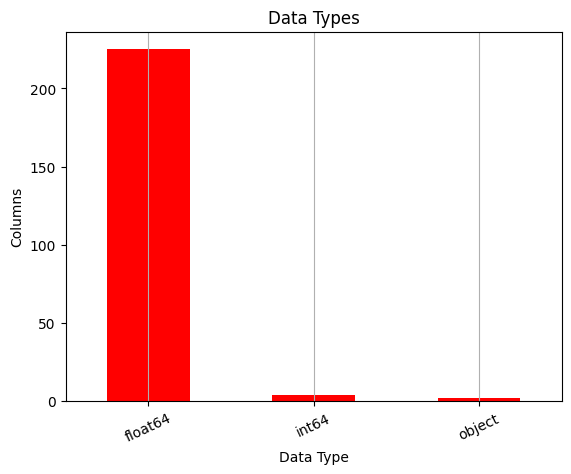

In [ ]:
dtypes.plot(kind='bar', color='red')
plt.title('Data Types')
plt.ylabel('Columns')
plt.xlabel('Data Type')
plt.xticks(rotation=25)
plt.grid(axis='x')
plt.show()

**Visualizing missing values**

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64


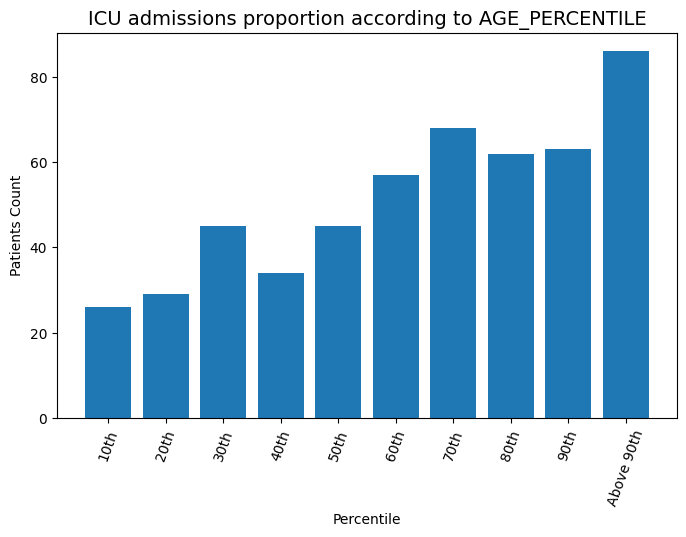

In [ ]:
#Age distribution of patients(percentiles) according to ICU admissions
AGE_prop_percentil = df[df['ICU'] == 1]
AGE_prop_percentil = AGE_prop_percentil.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(8,5))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"])
plt.xticks(rotation = 70)
plt.ylabel("Patients Count")
plt.xlabel("Percentile")
plt.title('ICU admissions proportion according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()

It is understood that it is biased towards the age feature.

In [ ]:
# Set the size of each individual subplot
subplot_size = (6, 4)

# Calculate the number of rows needed
num_rows = len(df.columns) // 3 + (len(df.columns) % 3 > 0)

# Set the size of the entire figure
figure_size = (18, 4 * num_rows)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 3, figsize=figure_size)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature on a separate subplot
for i, feature in enumerate(df.columns):
    axes[i].hist(df[feature])
    axes[i].set_title(feature)

# Hide any remaining empty subplots
for i in range(len(df.columns), num_rows * 3):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


we can see there are skewness in some features


In [ ]:
df=df.replace(-1,np.nan)

In [ ]:
# Print total number of NaN values
print('NaN values =', df.isnull().sum().sum())
print("\n")

missing_var = []

for feature in df.columns:
    miss = df[feature].isna().sum()
    if miss > 0:
        missing_var.append(feature)
        missing_val = miss / df.shape[0]
        print('The feature {} has {} records ({:.2%}) with missing values.'.format(feature, miss, missing_val))

print('There are {} features with missing values'.format(len(missing_var)))

NaN values = 269664


The feature DISEASE GROUPING 1 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 2 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 3 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 4 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 5 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 6 has 5 records (0.26%) with missing values.
The feature HTN has 5 records (0.26%) with missing values.
The feature IMMUNOCOMPROMISED has 5 records (0.26%) with missing values.
The feature OTHER has 5 records (0.26%) with missing values.
The feature ALBUMIN_MEDIAN has 1104 records (57.35%) with missing values.
The feature ALBUMIN_MEAN has 1104 records (57.35%) with missing values.
The feature ALBUMIN_MIN has 1104 records (57.35%) with missing values.
The feature ALBUMIN_MAX has 1104 records (57.35%) with missing values.
The feature ALBUMIN_DIFF has 1925 records (100.00%) w

In [ ]:
# Calculate the percentage of missing values for each feature
missing_percentage = df.isnull().mean() * 100

# Filter the features with more than 50% missing values
features_with_many_missing = missing_percentage[missing_percentage > 50]

# Enumerate and display each feature with its corresponding percentage of missing values
for idx, (feature, percentage) in enumerate(features_with_many_missing.items(), 1):
    print(f"{idx}. Feature {feature} is missing {percentage:.2f}% of its values")

1. Feature ALBUMIN_MEDIAN is missing 57.35% of its values
2. Feature ALBUMIN_MEAN is missing 57.35% of its values
3. Feature ALBUMIN_MIN is missing 57.35% of its values
4. Feature ALBUMIN_MAX is missing 57.35% of its values
5. Feature ALBUMIN_DIFF is missing 100.00% of its values
6. Feature BE_ARTERIAL_MEDIAN is missing 96.10% of its values
7. Feature BE_ARTERIAL_MEAN is missing 96.10% of its values
8. Feature BE_ARTERIAL_MIN is missing 96.10% of its values
9. Feature BE_ARTERIAL_MAX is missing 96.10% of its values
10. Feature BE_ARTERIAL_DIFF is missing 100.00% of its values
11. Feature BE_VENOUS_MEDIAN is missing 87.64% of its values
12. Feature BE_VENOUS_MEAN is missing 87.64% of its values
13. Feature BE_VENOUS_MIN is missing 87.64% of its values
14. Feature BE_VENOUS_MAX is missing 87.64% of its values
15. Feature BE_VENOUS_DIFF is missing 100.00% of its values
16. Feature BIC_ARTERIAL_MEDIAN is missing 57.40% of its values
17. Feature BIC_ARTERIAL_MEAN is missing 57.40% of its va

<Axes: >

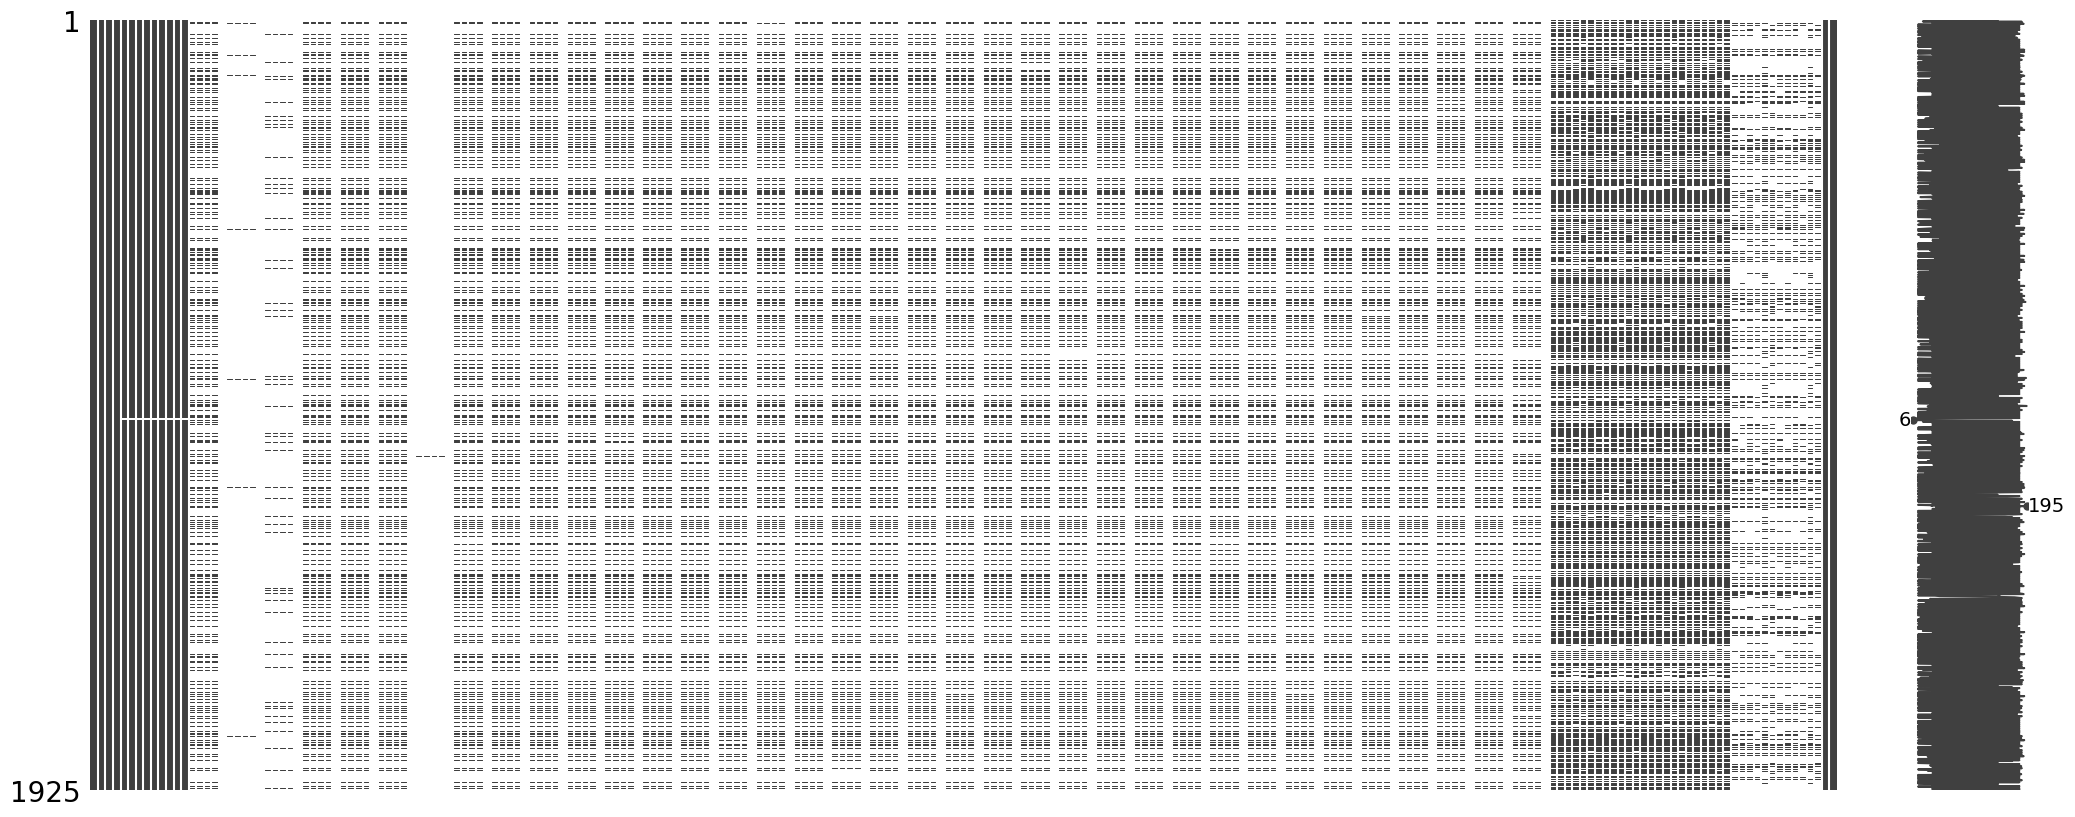

In [ ]:
%matplotlib inline
msno.matrix(df)

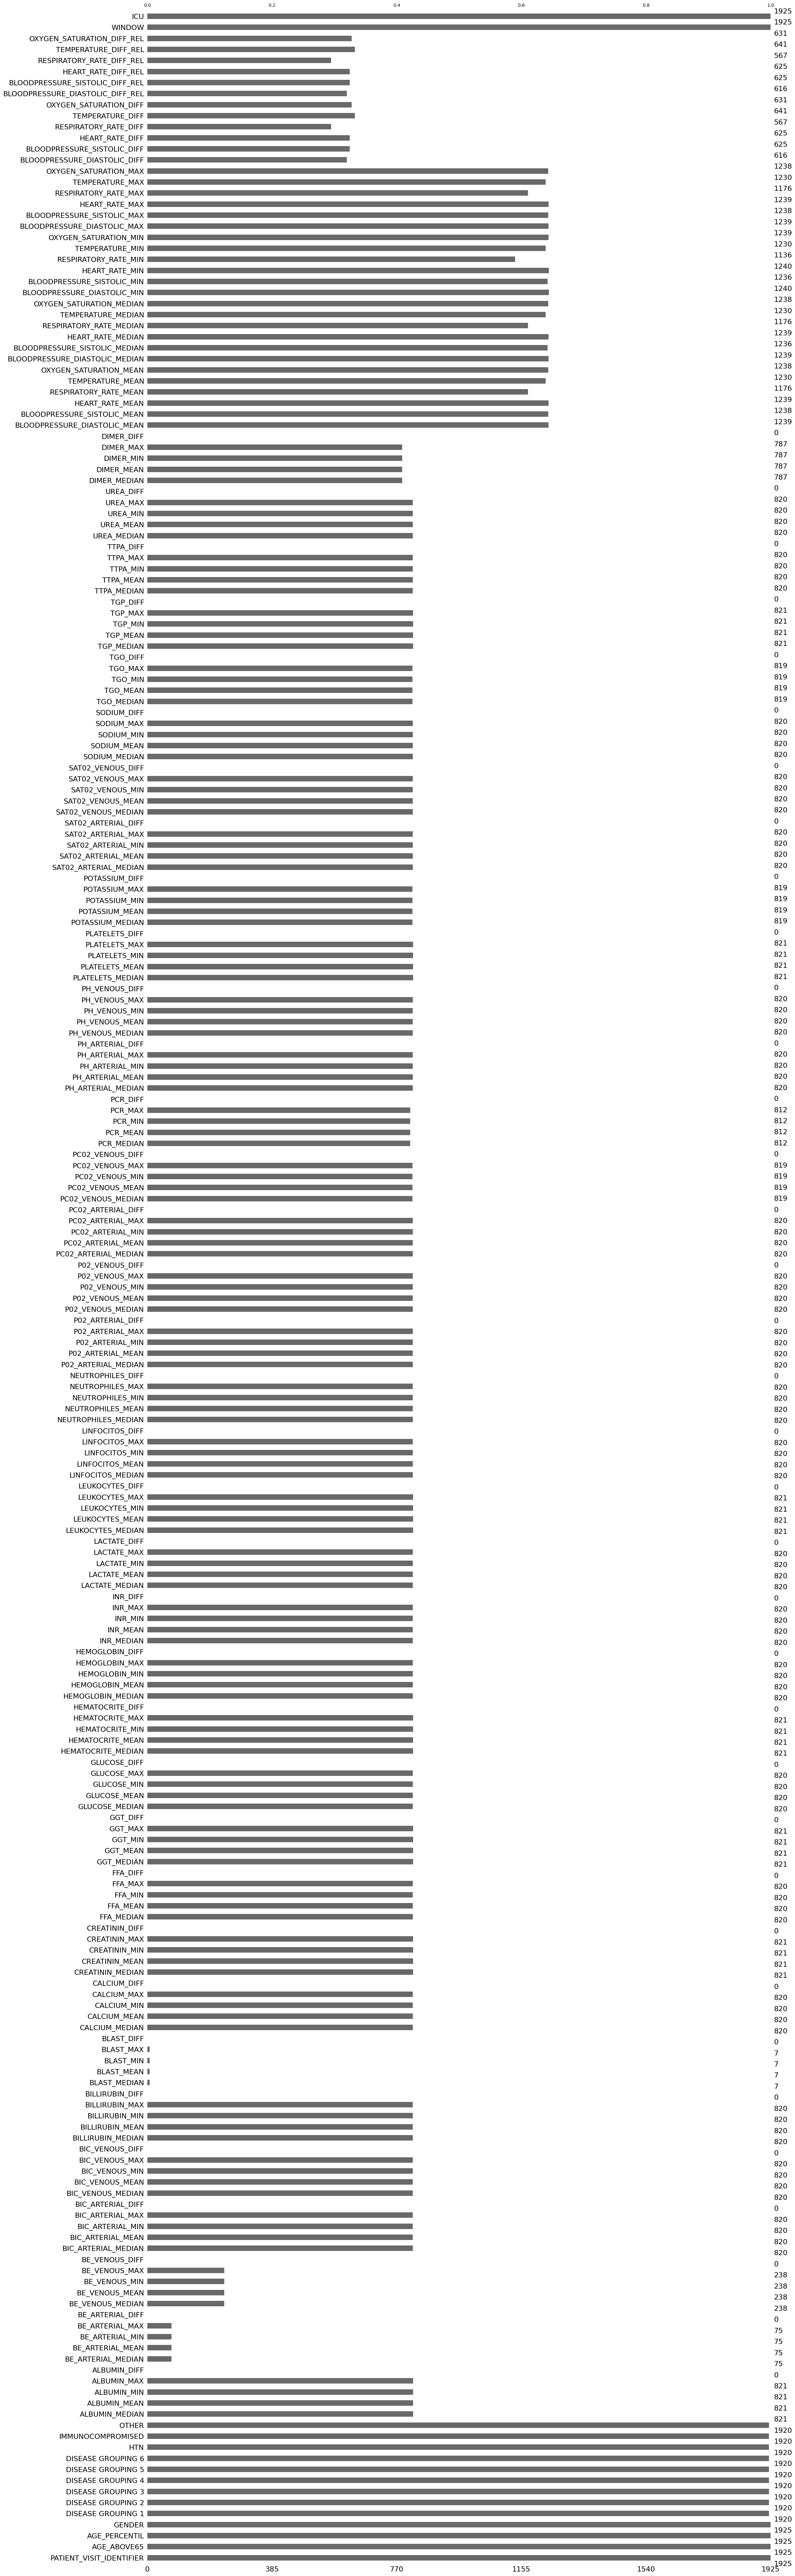

In [ ]:
msno.bar(df);

In [ ]:
threshold = 0.5 * len(df)
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Print the columns in the cleaned DataFrame
print("Remaining columns after dropping values with more than 50% missing values:")
print(df_cleaned.columns)

Remaining columns after dropping values with more than 50% missing values:
Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN',
       'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN',
       'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX',
       'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX',
       '

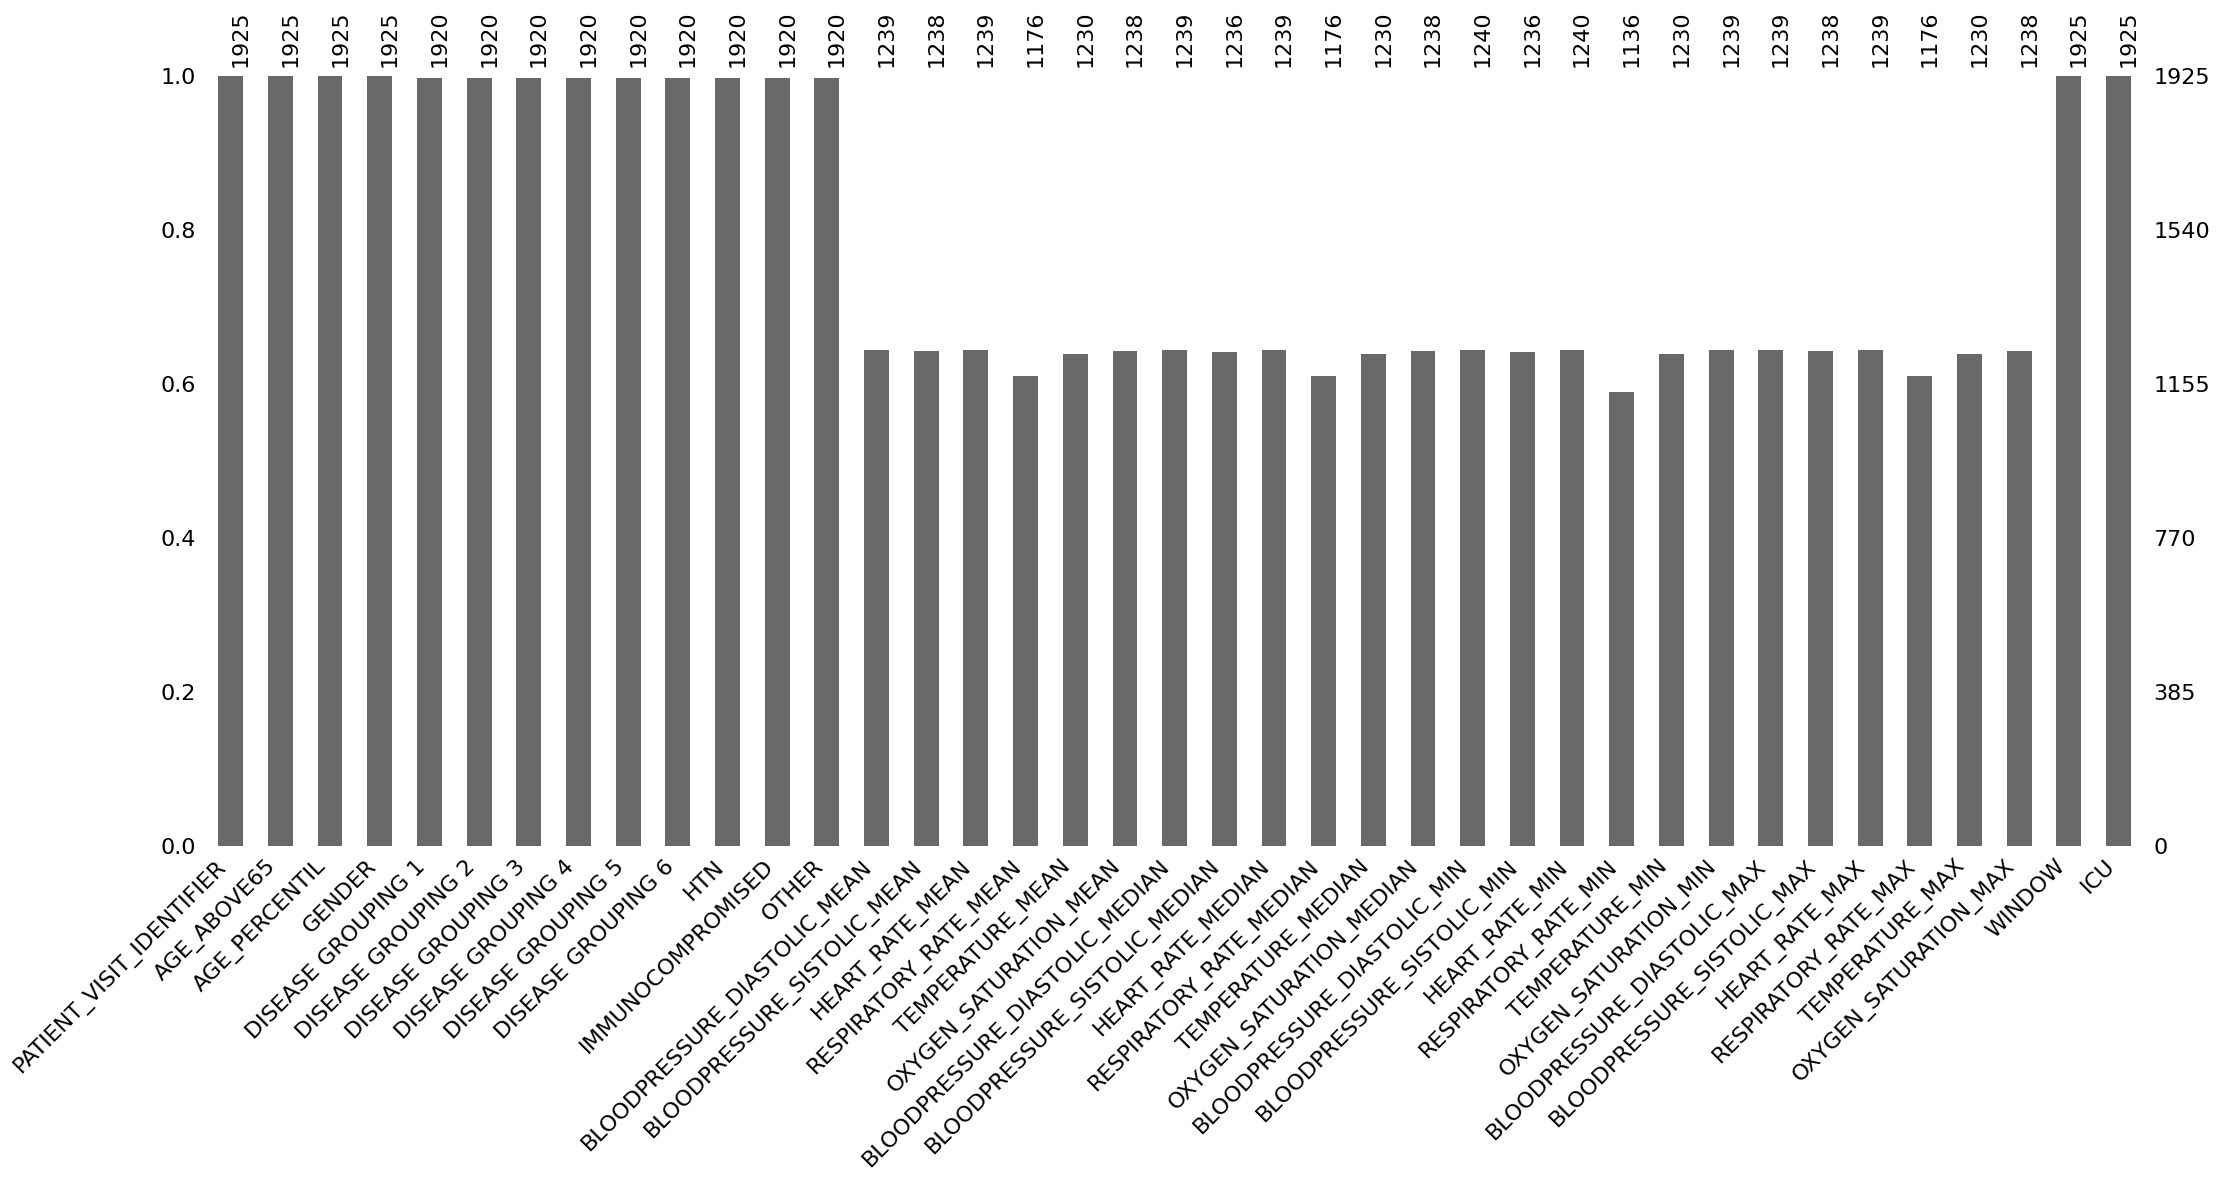

In [ ]:
msno.bar(df_cleaned)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Show the plot
plt.show()

<Axes: >

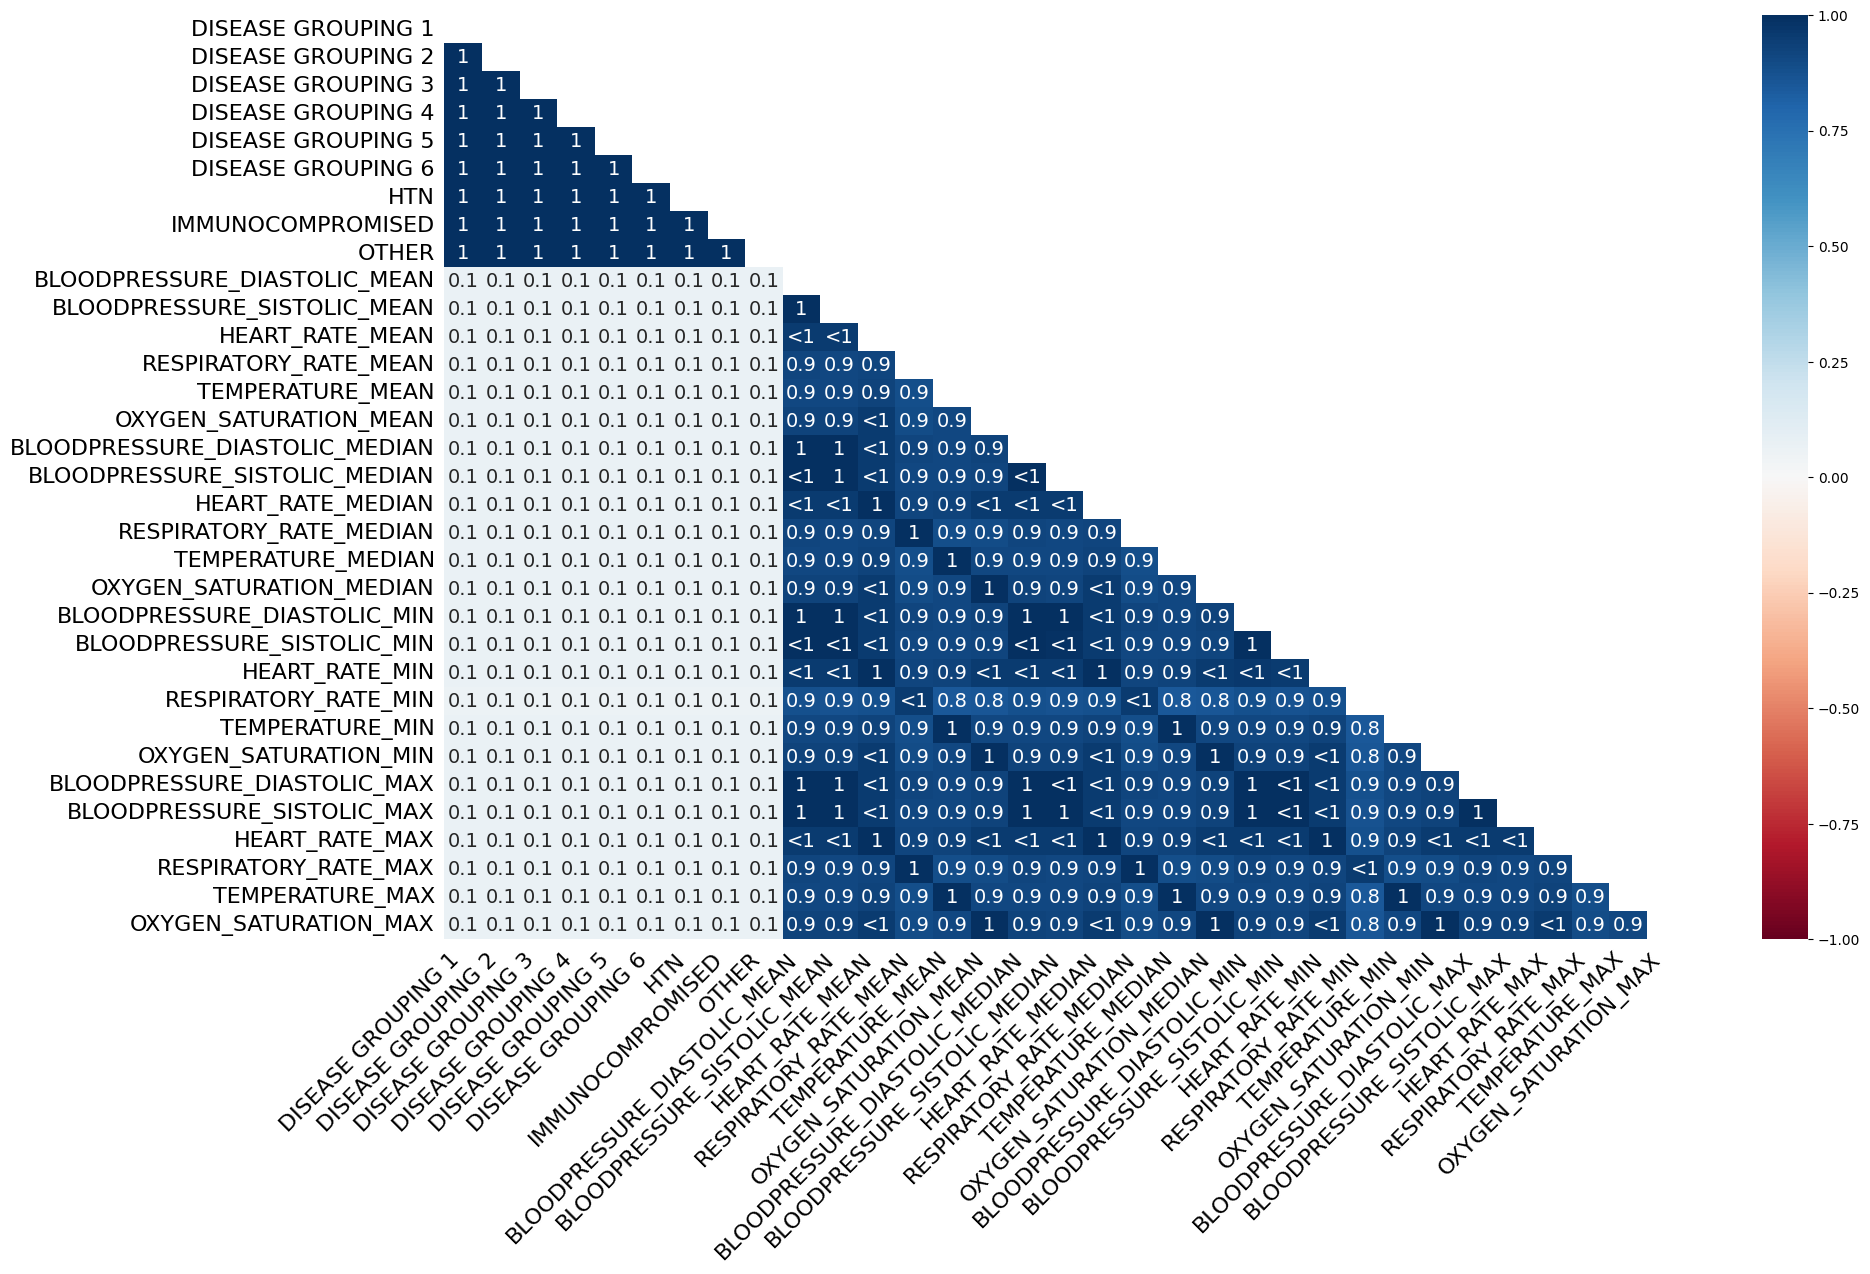

In [ ]:
msno.heatmap(df_cleaned)
#msno.heatmap() provides a visual representation for creating a heatmap of missing data patterns in a Pandas DataFrame using the'missingno' module.

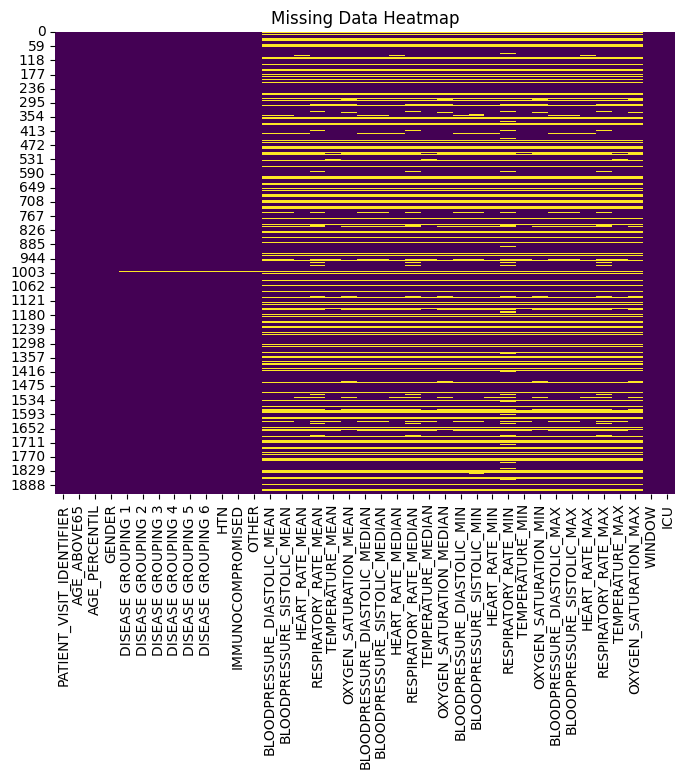

In [ ]:
#To understand the msno.heatmap() more clearly and making it more visually appealing
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis', ax=ax)
ax.set_title('Missing Data Heatmap')
plt.show()

<ipython-input-23-64a7f1566361>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_missings, x='column', y='missing(%)',palette='nipy_spectral')


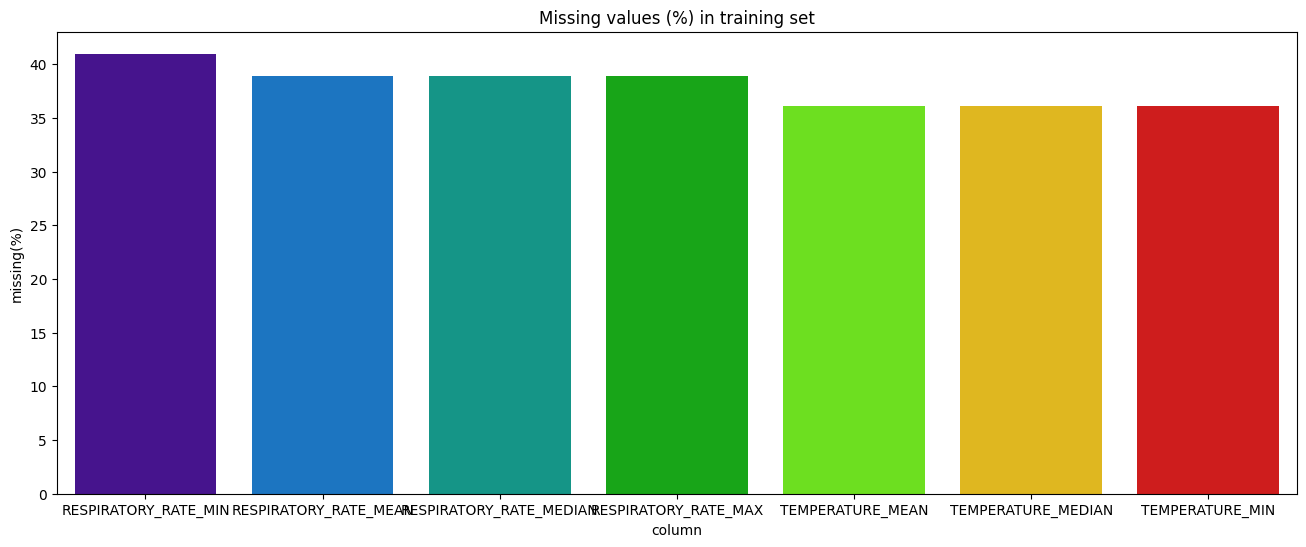

In [ ]:
df_missing = pd.DataFrame({'column':df_cleaned.columns, 'missing(%)':((df_cleaned.isna()).sum()/df_cleaned.shape[0])*100})

df_missings = df_missing.nlargest(7, 'missing(%)')

sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(16,6))
sns.barplot(data= df_missings, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in training set')
plt.show()


In summary, this bar plot visually represent the percentage of missing values for the top 7 columns with the highest percentage of missing values in the df_cleaned

In [ ]:
df.ICU.value_counts() # imbalanced

0    1410
1     515
Name: ICU, dtype: int64

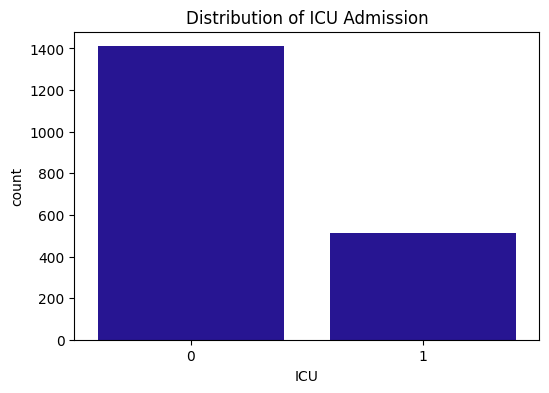

In [ ]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='ICU', data=df)
plt.title('Distribution of ICU Admission')
plt.show()

The graph shows the distribution of target variable in the dataset. the 0 represents the patients not admitted in the ICU and 1 represents the patients admitted in the ICU

In [ ]:
icu_data = df.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_data.head(15)

PATIENT_VISIT_IDENTIFIER              ICU                           WINDOW
0                          0  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
1                          1  [1, 1, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
2                          2  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
3                          3  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
4                          4  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
5                          5  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
6                          6  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
7                          7  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
8                          8  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
9                          9  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
10                        10  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
11                        11  [0, 0, 0, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
12                        12  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
13                        13  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
14                        14  [0, 0, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]

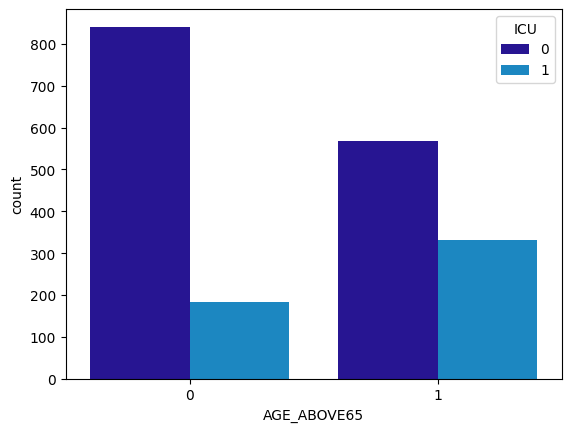

In [ ]:
sns.set_color_codes("pastel")
ax = sns.countplot(x="AGE_ABOVE65", hue="ICU", data=df)

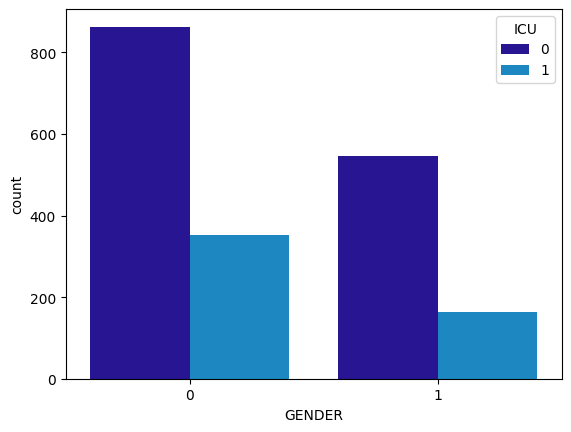

In [ ]:
ax = sns.countplot(x="GENDER", hue="ICU", data=df)

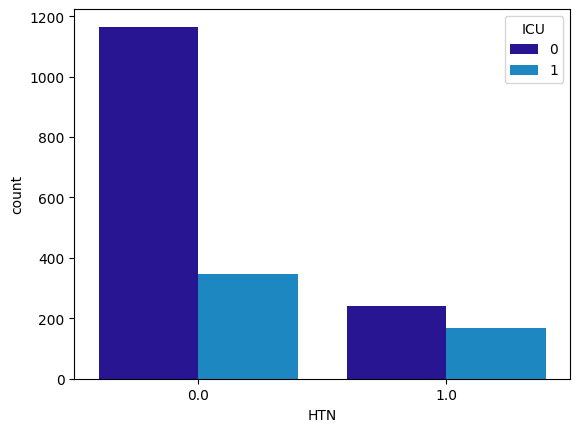

In [ ]:
ax = sns.countplot(x="HTN", hue="ICU", data=df)

<Axes: xlabel='IMMUNOCOMPROMISED', ylabel='count'>

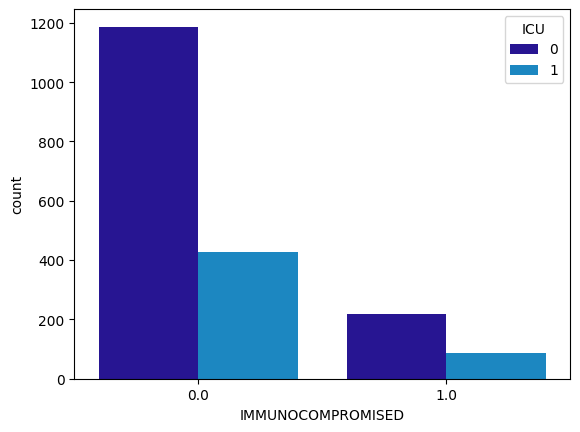

In [ ]:
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=df)

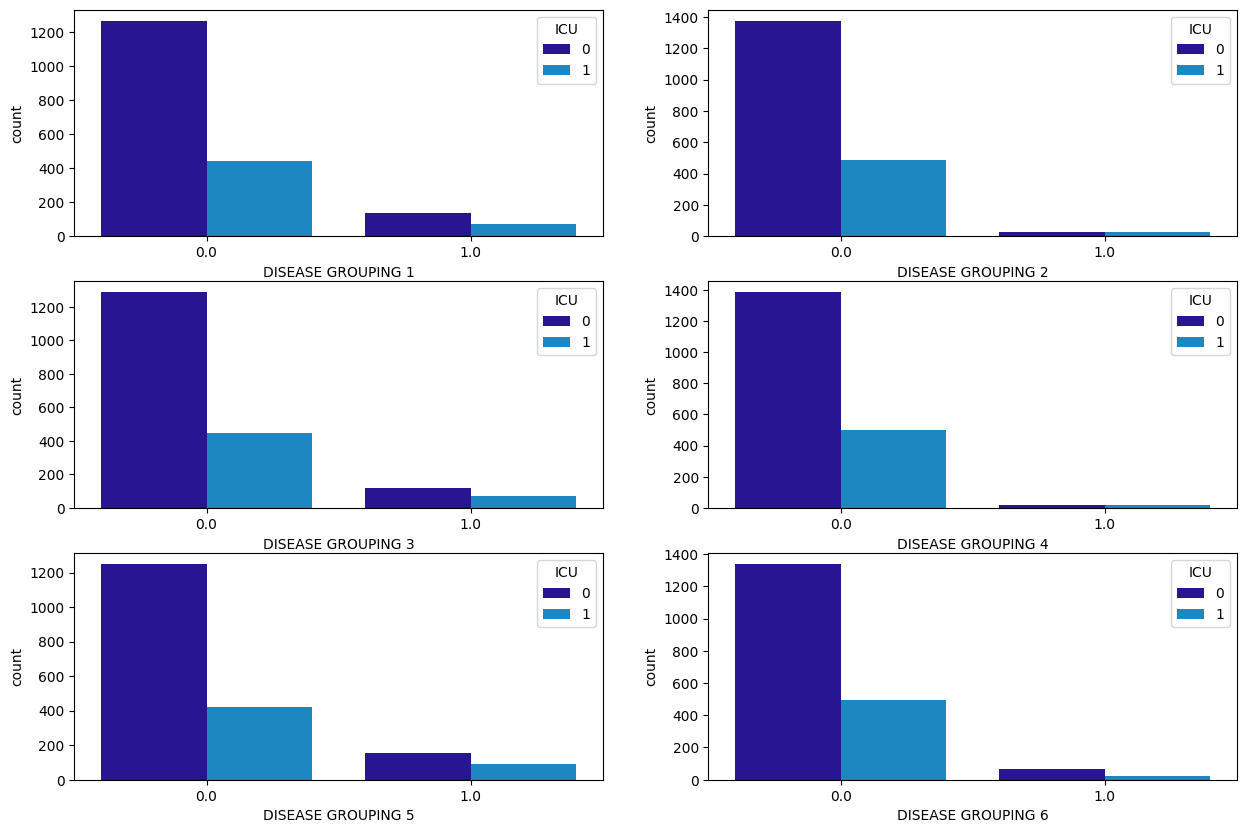

In [ ]:
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))
col = 0

for i in range(len(disease_grp)):
    sns.countplot(x=disease_grp[i], hue="ICU", data=df, ax = axes[int((i)/2)][col])
    col = (col+1) % 2

<Axes: >

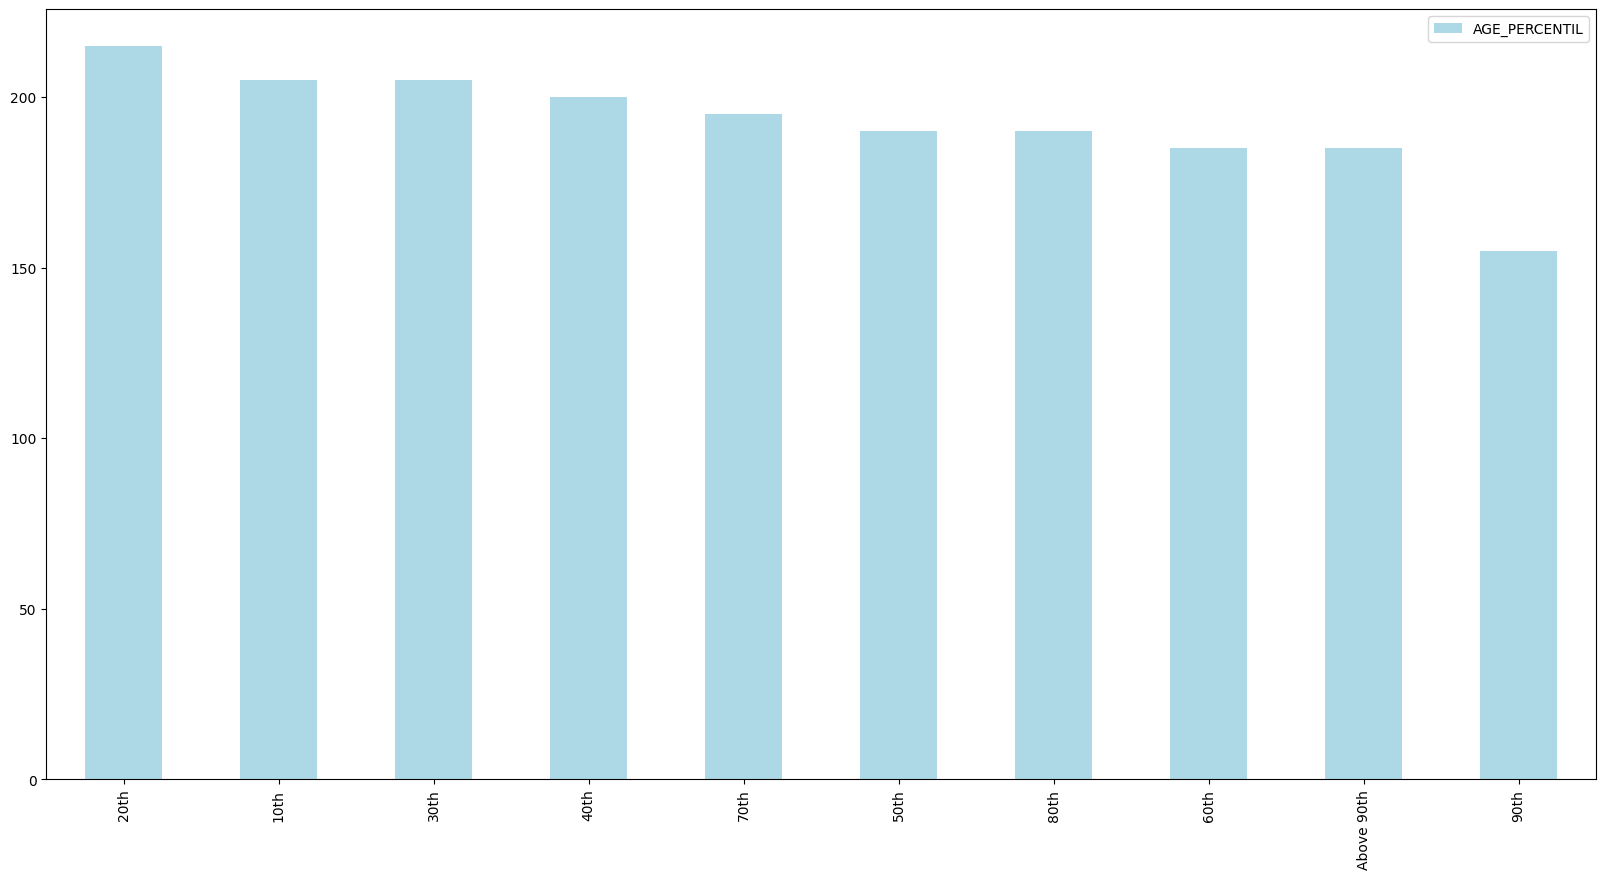

In [ ]:
pd.DataFrame(df['AGE_PERCENTIL'].value_counts()).plot(kind='bar', figsize=(20,10),color="lightblue")

In [ ]:
vital = df.columns[13:]
vital_df = df[vital]
vital_df.drop(columns = ["WINDOW"],inplace=True)

<ipython-input-33-7e5034b3f60a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vital_df.drop(columns = ["WINDOW"],inplace=True)


In [ ]:
vital = list(vital)
vital.remove("WINDOW")

In [ ]:
vital

['ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ_MEDIAN',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'CREATININ_DIFF',
 'FFA_MEDIAN',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'FFA_DIFF',
 'GGT_MEDIAN',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GGT_DIFF',
 'GLUCOSE_MEDIAN',
 

In [ ]:
vital_df

ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  \
0                NaN           NaN          NaN          NaN           NaN   
1                NaN           NaN          NaN          NaN           NaN   
2           0.605263      0.605263     0.605263     0.605263           NaN   
3                NaN           NaN          NaN          NaN           NaN   
4           0.000000      0.000000     0.000000     0.000000           NaN   
...              ...           ...          ...          ...           ...   
1920             NaN           NaN          NaN          NaN           NaN   
1921        0.605263      0.605263     0.605263     0.605263           NaN   
1922             NaN           NaN          NaN          NaN           NaN   
1923             NaN           NaN          NaN          NaN           NaN   
1924        0.605263      0.605263     0.605263     0.605263           NaN   

      BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  \
0                    NaN               NaN              NaN              NaN   
1                    NaN               NaN              NaN              NaN   
2                    NaN               NaN              NaN              NaN   
3                    NaN               NaN              NaN              NaN   
4              -0.871658         -0.871658        -0.871658        -0.871658   
...                  ...               ...              ...              ...   
1920                 NaN               NaN              NaN              NaN   
1921                 NaN               NaN              NaN              NaN   
1922                 NaN               NaN              NaN              NaN   
1923                 NaN               NaN              NaN              NaN   
1924                 NaN               NaN              NaN              NaN   

      BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  \
0                  NaN               NaN             NaN            NaN   
1                  NaN               NaN             NaN            NaN   
2                  NaN               NaN             NaN            NaN   
3                  NaN               NaN             NaN            NaN   
4                  NaN         -0.863874       -0.863874      -0.863874   
...                ...               ...             ...            ...   
1920               NaN               NaN             NaN            NaN   
1921               NaN         -0.717277       -0.717277      -0.717277   
1922               NaN               NaN             NaN            NaN   
1923               NaN               NaN             NaN            NaN   
1924               NaN               NaN             NaN            NaN   

      BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  \
0               NaN             NaN                  NaN                NaN   
1               NaN             NaN                  NaN                NaN   
2               NaN             NaN            -0.317073          -0.317073   
3               NaN             NaN                  NaN                NaN   
4         -0.863874             NaN            -0.317073          -0.317073   
...             ...             ...                  ...                ...   
1920            NaN             NaN                  NaN                NaN   
1921      -0.717277             NaN            -0.317073          -0.317073   
1922            NaN             NaN                  NaN                NaN   
1923            NaN             NaN                  NaN                NaN   
1924            NaN             NaN            -0.317073          -0.317073   

      BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  \
0                  NaN               NaN                NaN   
1                  NaN               NaN                NaN   
2            -0.317073         -0.317073                NaN   
3     

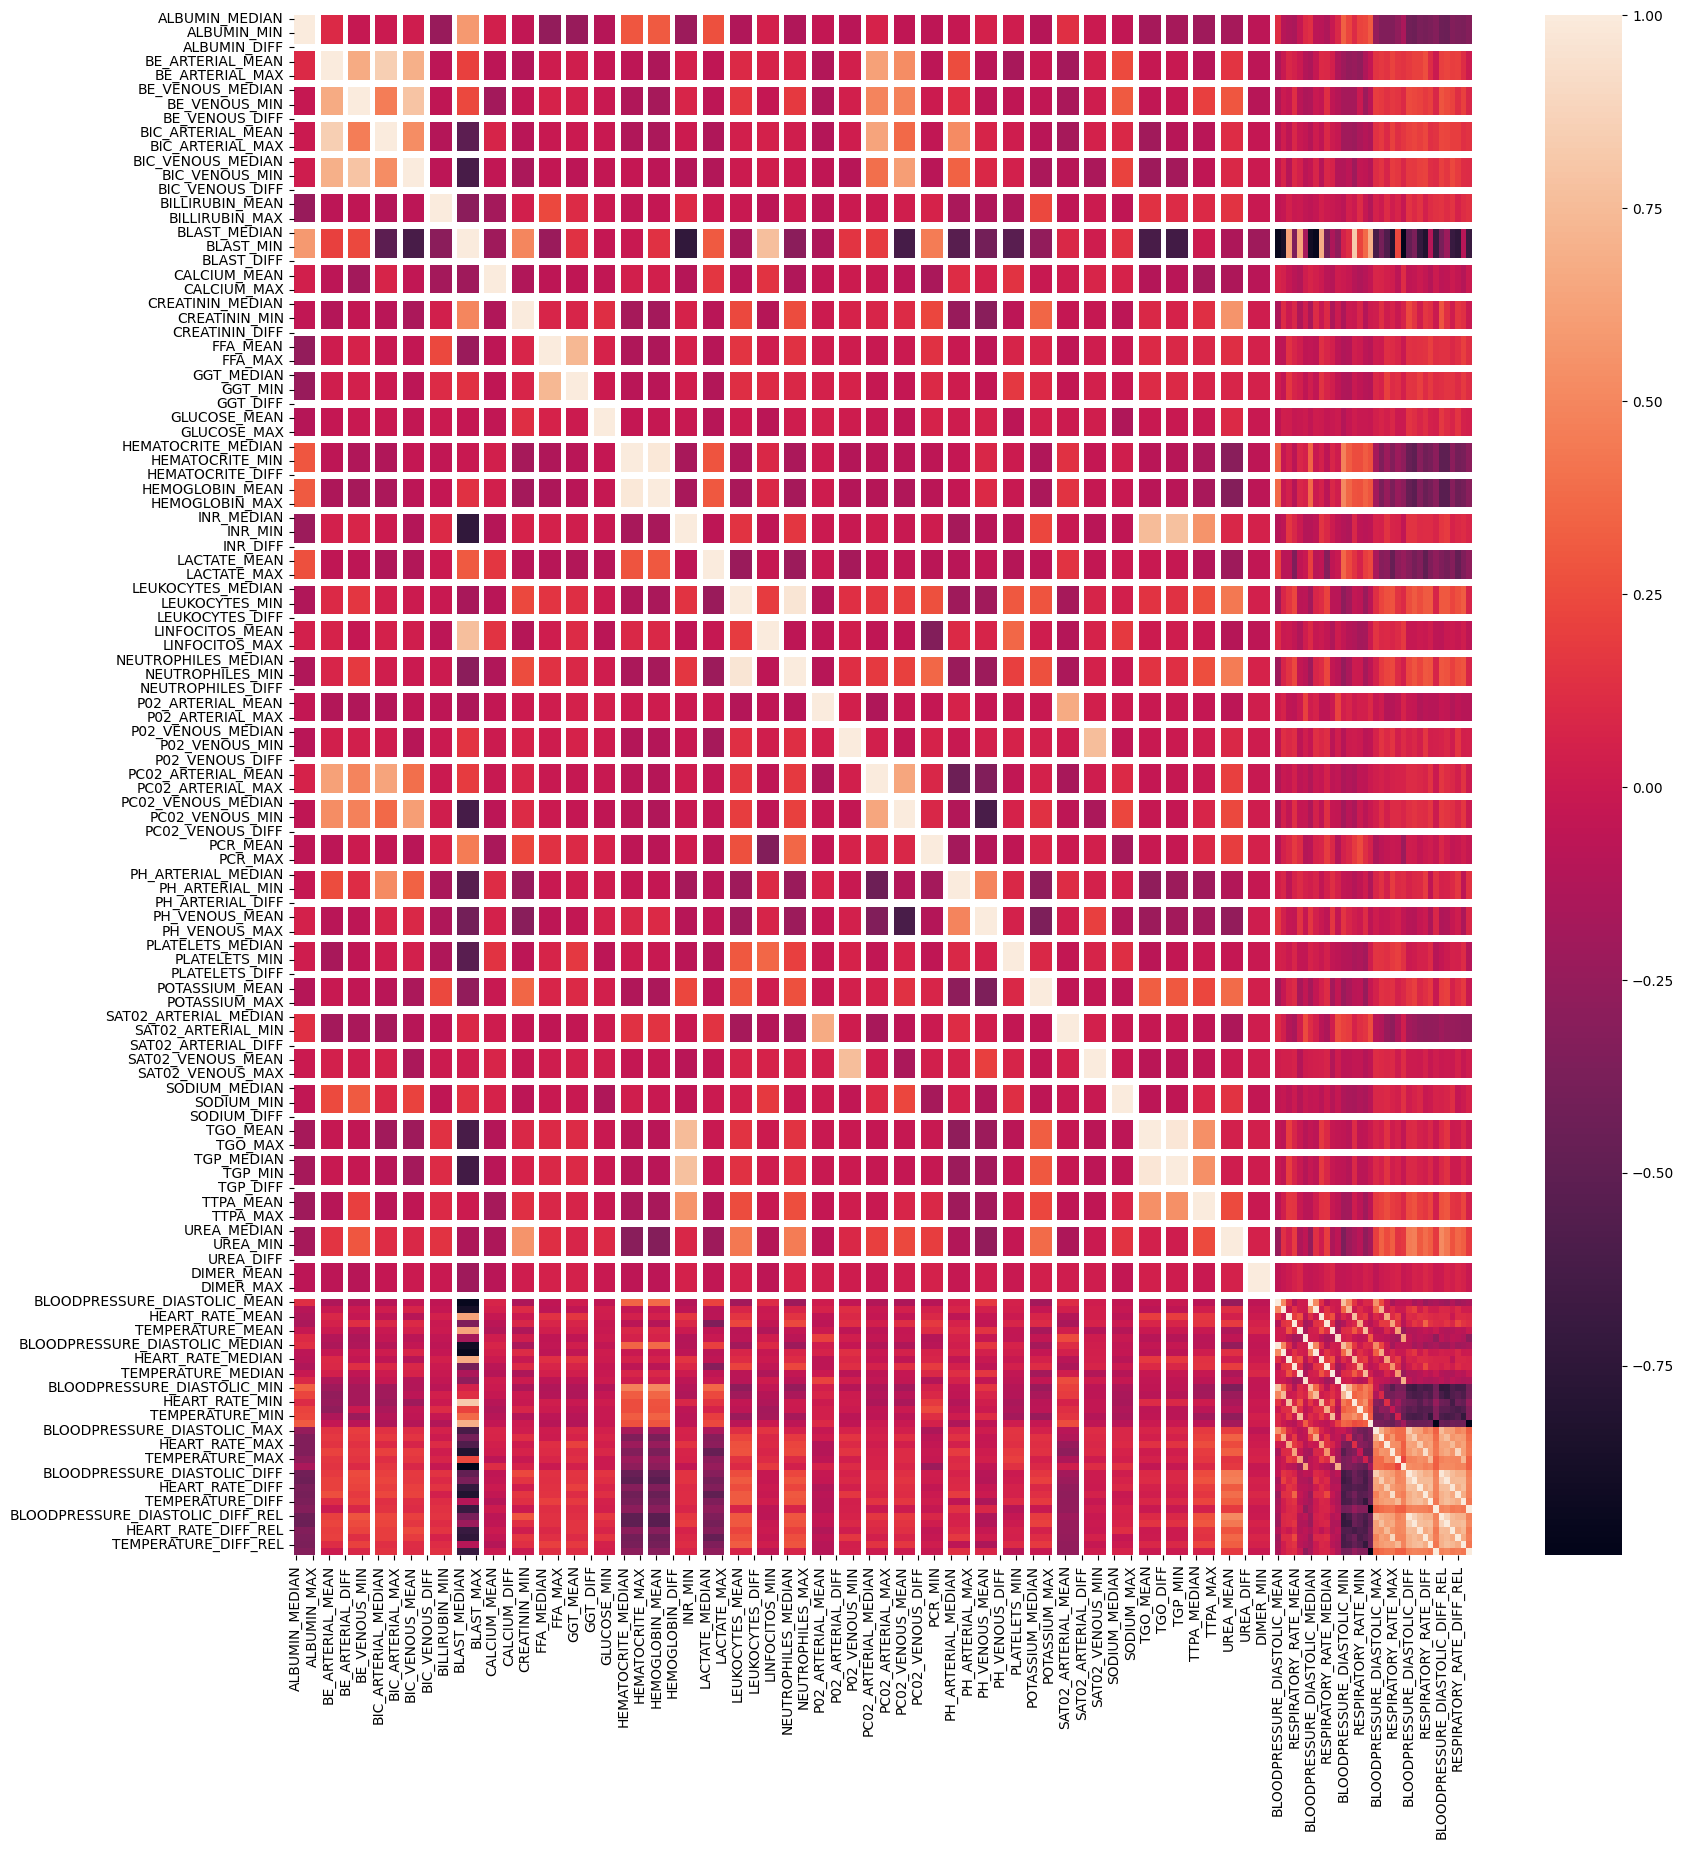

In [ ]:
f,ax = plt.subplots(figsize=(19,20))
sns.heatmap(vital_df.drop(columns=['ICU']).corr())
plt.show()

In [ ]:
rows_list = []
for f in vital:
    v1 = vital_df[ vital_df['ICU']==1 ][f].var()
    v0 = vital_df[ vital_df['ICU']==0 ][f].var()
    dictionary = {
        'feature' : f,
        'icu' : v1,
        'non-icu' : v0
    }
    rows_list.append(dictionary)

vital_signs = pd.DataFrame(rows_list)

In [ ]:
vital_signs

feature       icu   non-icu
0                ALBUMIN_MEDIAN  0.102375  0.016011
1                  ALBUMIN_MEAN  0.102375  0.016011
2                   ALBUMIN_MIN  0.102375  0.016011
3                   ALBUMIN_MAX  0.102375  0.016011
4                  ALBUMIN_DIFF       NaN       NaN
..                          ...       ...       ...
212         HEART_RATE_DIFF_REL  0.112769  0.035300
213   RESPIRATORY_RATE_DIFF_REL  0.270141  0.044917
214        TEMPERATURE_DIFF_REL  0.129324  0.057729
215  OXYGEN_SATURATION_DIFF_REL  0.235693  0.054185
216                         ICU  0.000000  0.000000

[217 rows x 3 columns]

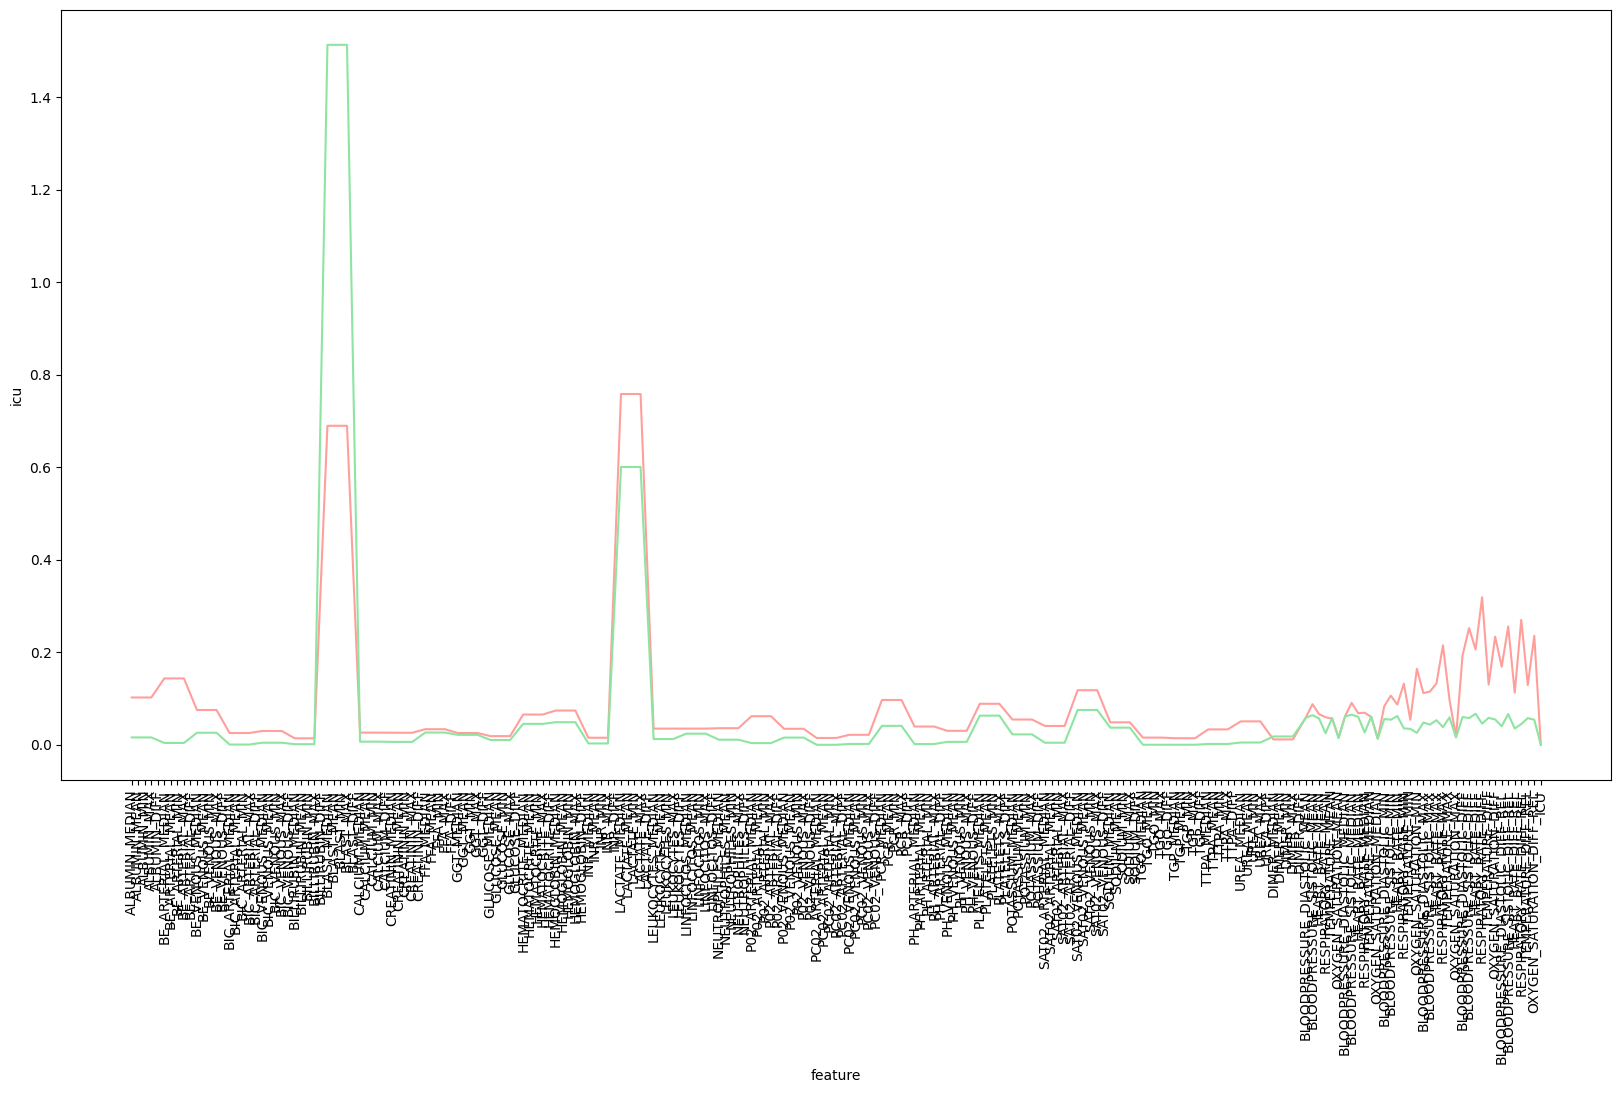

In [ ]:
figure = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=vital_signs, x="feature", y="icu", color='r')
sns.lineplot(data=vital_signs, x="feature", y="non-icu", color='g')
plt.xticks(rotation=90)
plt.show()

 #**Correlation**

In [ ]:
#correlation between features
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-41-dcad90a240d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65    GENDER  \
PATIENT_VISIT_IDENTIFIER                    1.000000    -0.030727  0.059772   
AGE_ABOVE65                                -0.030727     1.000000  0.049744   
GENDER                                      0.059772     0.049744  1.000000   
DISEASE GROUPING 1                          0.076389     0.266971  0.038474   
DISEASE GROUPING 2                          0.044868     0.067469 -0.032425   
...                                              ...          ...       ...   
HEART_RATE_DIFF_REL                        -0.062864     0.078043 -0.061459   
RESPIRATORY_RATE_DIFF_REL                  -0.033841     0.194526 -0.032294   
TEMPERATURE_DIFF_REL                       -0.009434     0.120793 -0.039388   
OXYGEN_SATURATION_DIFF_REL                 -0.084552     0.156462 -0.053648   
ICU                                        -0.047547     0.212198 -0.065543   

                            DISEASE GROUPING 1  DISEASE GROUPING 2  \
PATIENT_VISIT_IDENTIFIER              0.076389            0.044868   
AGE_ABOVE65                           0.266971            0.067469   
GENDER                                0.038474           -0.032425   
DISEASE GROUPING 1                    1.000000            0.194104   
DISEASE GROUPING 2                    0.194104            1.000000   
...                                        ...                 ...   
HEART_RATE_DIFF_REL                   0.075491            0.079411   
RESPIRATORY_RATE_DIFF_REL             0.098237            0.161710   
TEMPERATURE_DIFF_REL                  0.023624            0.125211   
OXYGEN_SATURATION_DIFF_REL           -0.021001            0.126000   
ICU                                   0.061308            0.081883   

                            DISEASE GROUPING 3  DISEASE GROUPING 4  \
PATIENT_VISIT_IDENTIFIER              0.041014           -0.017013   
AGE_ABOVE65                           0.157591            0.016392   
GENDER                               -0.074494           -0.054625   
DISEASE GROUPING 1                    0.240389            0.010628   
DISEASE GROUPING 2                    0.102950            0.111533   
...                                        ...                 ...   
HEART_RATE_DIFF_REL                   0.131012            0.029518   
RESPIRATORY_RATE_DIFF_REL             0.155858            0.044440   
TEMPERATURE_DIFF_REL                  0.136617            0.024750   
OXYGEN_SATURATION_DIFF_REL            0.108476            0.055793   
ICU                                   0.077422            0.057456   

                            DISEASE GROUPING 5  DISEASE GROUPING 6       HTN  \
PATIENT_VISIT_IDENTIFIER              0.009263            0.014407 -0.015724   
AGE_ABOVE65                           0.305052           -0.015739  0.319354   
GENDER                               -0.022495           -0.016748 -0.029630   
DISEASE GROUPING 1                    0.332670            0.168473  0.416207   
DISEASE GROUPING 2                    0.142148           -0.007918  0.150010   
...                                        ...                 ...       ...   
HEART_RATE_DIFF_REL                   0.148261            0.093692  0.156408   
RESPIRATORY_RATE_DIFF_REL             0.165136            0.081410  0.188997   
TEMPERATURE_DIFF_REL                  0.104542            0.118646  0.152099   
OXYGEN_SATURATION_DIFF_REL            0.058458            0.065308  0.089984   
ICU                                   0.087988           -0.006344  0.170247   

                            IMMUNOCOMPROMISED     OTHER  ALBUMIN_MEDIAN  \
PATIENT_VISIT_IDENTIFIER             0.011507  0.033008        0.036972   
AGE_ABOVE65                          0.152959  0.074727       -0.160707   
GENDER                              -0.007142  0.027424       -0.000063   
DISEASE GROUPING 1                   0.183926  0.156061       -0.067750   
DISEASE GROUPING 2                   0.124698  0.082418      

<ipython-input-42-439377970cfa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


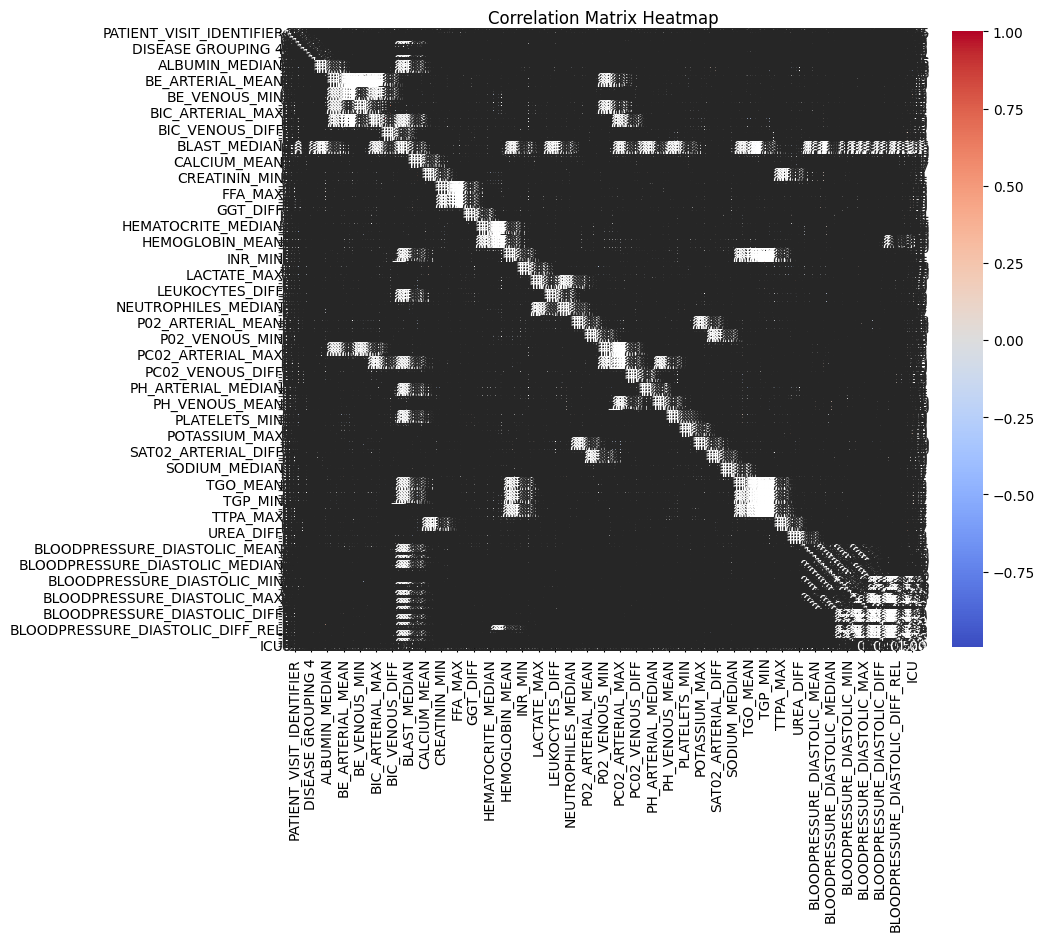

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

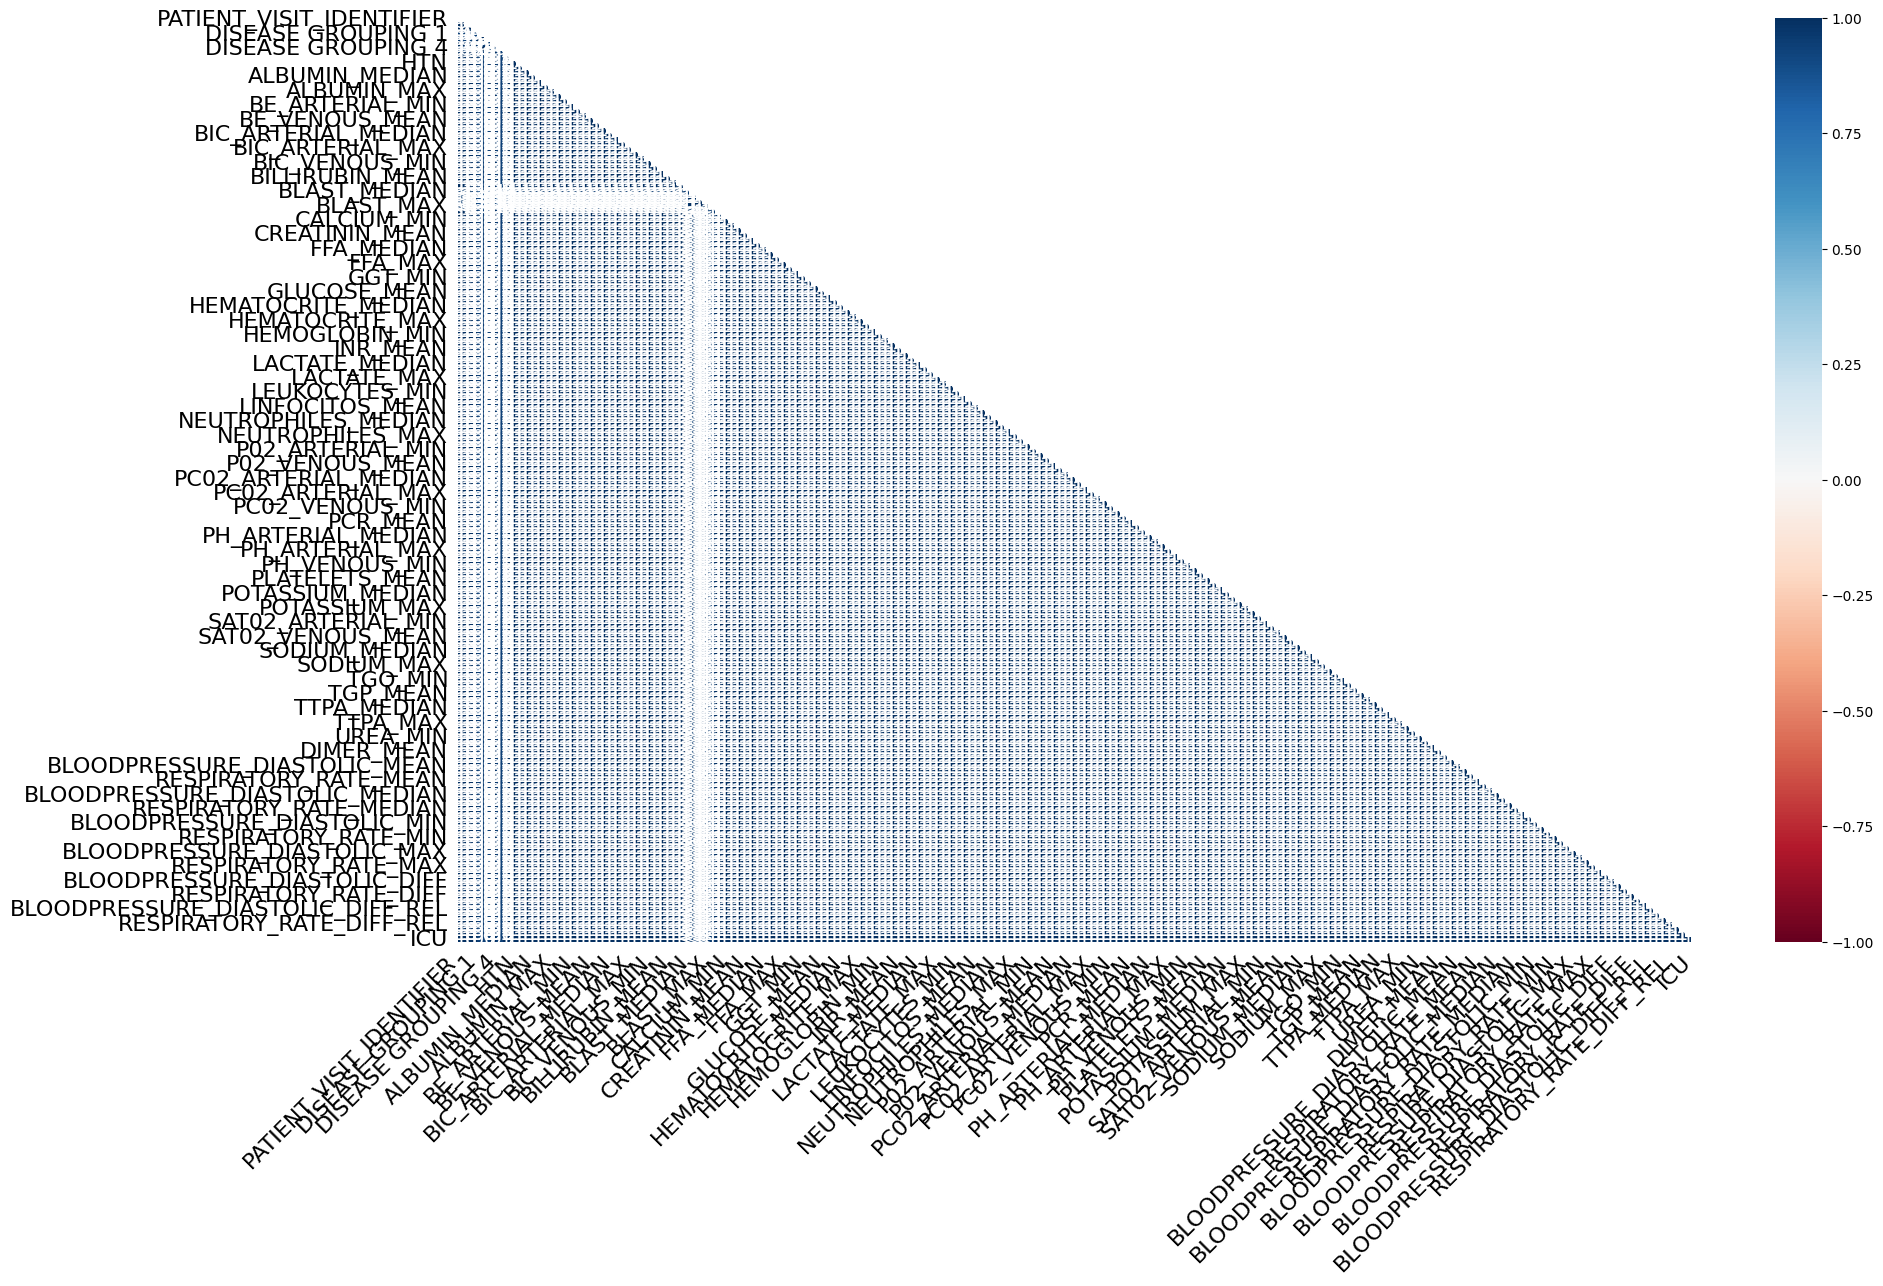

In [ ]:
msno.heatmap(correlation_matrix)

# **3.Feature Engineering**

In [ ]:
# Extract non-numerical features
non_numerical_features = df.select_dtypes(exclude=['number']).columns.tolist()

print("Non-Numerical Features:")
print(non_numerical_features)

Non-Numerical Features:
['AGE_PERCENTIL', 'WINDOW']


In [ ]:
# Check data types before removing duplicates
print("Data Types before removing duplicates:")
print(df.dtypes)

# Identify and keep only the first occurrence of each duplicated set
duplicated_columns = df.columns[df.T.duplicated(keep='first')].tolist()
df = df.loc[:, ~df.columns.isin(duplicated_columns)]

# Check data types after removing duplicates
print("\nData Types after removing duplicates:")
print(df.dtypes)

Data Types before removing duplicates:
PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

Data Types after removing duplicates:
PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 88, dtype: object


In [ ]:
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
1                            0            1          60th       0   
2                            0            1          60th       0   
3                            0            1          60th       0   
4                            0            1          60th       0   
...                        ...          ...           ...     ...   
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_DIFF  \
0                   0.0    1.0             NaN           NaN   
1                   0.0    1.0             NaN           NaN   
2                   0.0    1.0        0.605263           NaN   
3                   0.0    1.0             NaN           NaN   
4                   0.0    1.0        0.000000           NaN   
...                 ...    ...             ...           ...   
1920                0.0    1.0             NaN           NaN   
1921                0.0    1.0        0.605263           NaN   
1922                0.0    1.0             NaN           NaN   
1923                0.0    1.0             NaN           NaN   
1924                0.0    1.0        0.605263           NaN   

      BE_ARTERIAL_MEDIAN  BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  \
0                    NaN               NaN                  NaN   
1                    NaN               NaN                  NaN   
2                    NaN               NaN            -0.317073   
3                    NaN               NaN                  NaN   
4              -0.871658         -0.863874            -0.317073   
...                  ...               ...                  ...   
1920                 NaN               NaN                  NaN   
1921                 NaN         -0.717277            -0.317073   
1922                 NaN               NaN                  NaN   
1923                 NaN               NaN  

In [ ]:
print("Data Types after removing duplicates:")
print(df.dtypes)

Data Types after removing duplicates:
PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 88, dtype: object


In [ ]:
df.shape

(1925, 88)

In [ ]:
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
1                            0            1          60th       0   
2                            0            1          60th       0   
3                            0            1          60th       0   
4                            0            1          60th       0   
...                        ...          ...           ...     ...   
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_DIFF  \
0                   0.0    1.0             NaN           NaN   
1                   0.0    1.0             NaN           NaN   
2                   0.0    1.0        0.605263           NaN   
3                   0.0    1.0             NaN           NaN   
4                   0.0    1.0        0.000000           NaN   
...                 ...    ...             ...           ...   
1920                0.0    1.0             NaN           NaN   
1921                0.0    1.0        0.605263           NaN   
1922                0.0    1.0             NaN           NaN   
1923                0.0    1.0             NaN           NaN   
1924                0.0    1.0        0.605263           NaN   

      BE_ARTERIAL_MEDIAN  BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  \
0                    NaN               NaN                  NaN   
1                    NaN               NaN                  NaN   
2                    NaN               NaN            -0.317073   
3                    NaN               NaN                  NaN   
4              -0.871658         -0.863874            -0.317073   
...                  ...               ...                  ...   
1920                 NaN               NaN                  NaN   
1921                 NaN         -0.717277            -0.317073   
1922                 NaN               NaN                  NaN   
1923                 NaN               NaN  

Invariant Features

In [ ]:
# identifying irrevelant columns
# Calculate the variance for each numerical column
variance_threshold = 0.1  # Adjust this threshold as needed
low_variance_columns = df.var()[df.var() < variance_threshold].index.tolist()

<ipython-input-50-eef1dc20e685>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  low_variance_columns = df.var()[df.var() < variance_threshold].index.tolist()
<ipython-input-50-eef1dc20e685>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  low_variance_columns = df.var()[df.var() < variance_threshold].index.tolist()


In [ ]:
# Identify columns with a high percentage of missing values
missing_value_threshold = 0.5  # Adjust this threshold as needed
missing_value_columns = df.columns[df.isnull().mean() > missing_value_threshold].tolist()


In [ ]:
# Combine both sets of irrelevant columns
irrelevant_columns = set(low_variance_columns + missing_value_columns)

In [ ]:
# Display the list of irrelevant columns
print("\nIrrelevant Columns:")
print(irrelevant_columns)


Irrelevant Columns:
{'RESPIRATORY_RATE_DIFF', 'BE_ARTERIAL_MEDIAN', 'HEMATOCRITE_MEDIAN', 'GGT_MEDIAN', 'OXYGEN_SATURATION_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_DIFF', 'DISEASE GROUPING 3', 'RESPIRATORY_RATE_MIN', 'NEUTROPHILES_MEDIAN', 'INR_MEDIAN', 'HEART_RATE_DIFF', 'TEMPERATURE_MEDIAN', 'HEART_RATE_DIFF_REL', 'BIC_VENOUS_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MIN', 'HEART_RATE_MIN', 'LEUKOCYTES_MEDIAN', 'BIC_ARTERIAL_MEDIAN', 'GLUCOSE_MEDIAN', 'CREATININ_MEDIAN', 'PH_ARTERIAL_MEDIAN', 'TEMPERATURE_MAX', 'HEART_RATE_MEAN', 'DISEASE GROUPING 4', 'RESPIRATORY_RATE_MEAN', 'OXYGEN_SATURATION_DIFF', 'BE_VENOUS_MEDIAN', 'PLATELETS_MEDIAN', 'POTASSIUM_MEDIAN', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_MIN', 'P02_VENOUS_MEDIAN', 'FFA_MEDIAN', 'BLAST_MEDIAN', 'PC02_ARTERIAL_MEDIAN', 'SAT02_ARTERIAL_MEDIAN', 'ALBUMIN_DIFF', 'BLOODPRESSURE_SISTOLIC_MIN', 'UREA_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MEDIAN', '

In [ ]:
# select non-numeric columns
df_num = df.select_dtypes(exclude=[np.number])
df_num

AGE_PERCENTIL    WINDOW
0             60th       0-2
1             60th       2-4
2             60th       4-6
3             60th      6-12
4             60th  ABOVE_12
...            ...       ...
1920          50th       0-2
1921          50th       2-4
1922          50th       4-6
1923          50th      6-12
1924          50th  ABOVE_12

[1925 rows x 2 columns]

**handling window**

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the names of categorical columns
print("Categorical Features:")
print(categorical_columns)

Categorical Features:
Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')


In [ ]:
# Group by 'PATIENT_VISIT_IDENTIFIER' and count the entries for each patient
patient_entries_count = df.groupby('PATIENT_VISIT_IDENTIFIER').size()

In [ ]:
# Display the counts
print(patient_entries_count)

PATIENT_VISIT_IDENTIFIER
0      5
1      5
2      5
3      5
4      5
      ..
380    5
381    5
382    5
383    5
384    5
Length: 385, dtype: int64


**changing categorical features to numerical with OrdinalEncoder**

In [ ]:
# Create an empty DataFrame to store the unique values
unique_values_table = pd.DataFrame(columns=['Feature', 'Unique_Values'])

# Iterate through each categorical feature
for feature in categorical_columns:
    unique_values = df[feature].unique()
    unique_values_table = unique_values_table.append({'Feature': feature, 'Unique_Values': unique_values}, ignore_index=True)

# Display the table
print(unique_values_table)

         Feature                                      Unique_Values
0  AGE_PERCENTIL  [60th, 90th, 10th, 40th, 70th, 20th, 50th, 80t...
1         WINDOW                    [0-2, 2-4, 4-6, 6-12, ABOVE_12]


<ipython-input-58-779aa75f0c44>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Feature': feature, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-58-779aa75f0c44>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Feature': feature, 'Unique_Values': unique_values}, ignore_index=True)


In [ ]:
# Select non-numerical features (categorical) using select_dtypes
non_numerical_features = df.select_dtypes(exclude='number').columns.tolist()

# Print or use the list of non-numerical features
print("Non-Numerical Features:", non_numerical_features)

Non-Numerical Features: ['AGE_PERCENTIL', 'WINDOW']


we know that each patient has 5 records in different 'window'. as the information of patient after admitting ICU =1 is not important the following codes will adress this problem.

In [ ]:
# as the order of 'WINDOW' is important for us we used OrdinalEncoder and assigned a label to each period
ordinal_mapping = {'0-2': 0, '2-4': 1, '4-6': 2, '6-12':3, 'ABOVE_12': 4}
df['WINDOW'] = df['WINDOW'].map(ordinal_mapping)
df['WINDOW']

#columns_to_display = ['PATIENT_VISIT_IDENTIFIER','WINDOW']
#rint(df[columns_to_display])


0       0
1       1
2       2
3       3
4       4
       ..
1920    0
1921    1
1922    2
1923    3
1924    4
Name: WINDOW, Length: 1925, dtype: int64

In [ ]:
#underestang relation between patientid and window and icu
columns_to_display = ['PATIENT_VISIT_IDENTIFIER', 'WINDOW','ICU']
print(df[columns_to_display])

      PATIENT_VISIT_IDENTIFIER  WINDOW  ICU
0                            0       0    0
1                            0       1    0
2                            0       2    0
3                            0       3    0
4                            0       4    1
...                        ...     ...  ...
1920                       384       0    0
1921                       384       1    0
1922                       384       2    0
1923                       384       3    0
1924                       384       4    0

[1925 rows x 3 columns]


In [ ]:
# Sort the DataFrame by patient_id and window
##this window feature rules like time period in this dataframe
df = df.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])

In [ ]:
df_PAICU =['PATIENT_VISIT_IDENTIFIER','ICU']
print(df[df_PAICU])


      PATIENT_VISIT_IDENTIFIER  ICU
0                            0    0
1                            0    0
2                            0    0
3                            0    0
4                            0    1
...                        ...  ...
1920                       384    0
1921                       384    0
1922                       384    0
1923                       384    0
1924                       384    0

[1925 rows x 2 columns]


In this step we drop records of each patient after they admitted to be ICU = 1, remaining first ICU =1 and dropped records after that.

In [ ]:
# Initialize an empty list to store indices to be dropped
indices_to_drop = []

# Iterate through the DataFrame
for i in range(1, len(df)):
    current_id = df.at[i, 'PATIENT_VISIT_IDENTIFIER']
    previous_id = df.at[i-1, 'PATIENT_VISIT_IDENTIFIER']

    current_icu = df.at[i, 'ICU']
    previous_icu = df.at[i-1, 'ICU']

    # Check if both current and previous rows have ICU admission and the IDs are the same
    if current_icu == 1 and previous_icu == 1 and current_id == previous_id:
        indices_to_drop.append(i)

# Drop the rows based on the indices collected
df.drop(indices_to_drop, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)



In [ ]:
df.shape

(1605, 88)

In [ ]:
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
1                            0            1          60th       0   
2                            0            1          60th       0   
3                            0            1          60th       0   
4                            0            1          60th       0   
...                        ...          ...           ...     ...   
1600                       384            0          50th       1   
1601                       384            0          50th       1   
1602                       384            0          50th       1   
1603                       384            0          50th       1   
1604                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1600                 0.0                 0.0                 0.0   
1601                 0.0                 0.0                 0.0   
1602                 0.0                 0.0                 0.0   
1603                 0.0                 0.0                 0.0   
1604                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1600                 0.0                 0.0                 0.0  0.0   
1601                 0.0                 0.0                 0.0  0.0   
1602                 0.0                 0.0                 0.0  0.0   
1603                 0.0                 0.0                 0.0  0.0   
1604                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_DIFF  \
0                   0.0    1.0             NaN           NaN   
1                   0.0    1.0             NaN           NaN   
2                   0.0    1.0        0.605263           NaN   
3                   0.0    1.0             NaN           NaN   
4                   0.0    1.0        0.000000           NaN   
...                 ...    ...             ...           ...   
1600                0.0    1.0             NaN           NaN   
1601                0.0    1.0        0.605263           NaN   
1602                0.0    1.0             NaN           NaN   
1603                0.0    1.0             NaN           NaN   
1604                0.0    1.0        0.605263           NaN   

      BE_ARTERIAL_MEDIAN  BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  \
0                    NaN               NaN                  NaN   
1                    NaN               NaN                  NaN   
2                    NaN               NaN            -0.317073   
3                    NaN               NaN                  NaN   
4              -0.871658         -0.863874            -0.317073   
...                  ...               ...                  ...   
1600                 NaN               NaN                  NaN   
1601                 NaN         -0.717277            -0.317073   
1602                 NaN               NaN                  NaN   
1603                 NaN               NaN  

since it is hard for machine to detect categorical features with big number of values, we used dummy for 'AGE_PERCENTIL' and since our work with window as time period have been done we can dummy it as well.

In [ ]:
#Applying OneHOt Encoding using Pandas

df = pd.get_dummies(df, columns=['AGE_PERCENTIL', 'WINDOW'])


In [ ]:
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  GENDER  DISEASE GROUPING 1  \
0                            0            1       0                 0.0   
1                            0            1       0                 0.0   
2                            0            1       0                 0.0   
3                            0            1       0                 0.0   
4                            0            1       0                 0.0   
...                        ...          ...     ...                 ...   
1600                       384            0       1                 0.0   
1601                       384            0       1                 0.0   
1602                       384            0       1                 0.0   
1603                       384            0       1                 0.0   
1604                       384            0       1                 0.0   

      DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1600                 0.0                 0.0                 0.0   
1601                 0.0                 0.0                 0.0   
1602                 0.0                 0.0                 0.0   
1603                 0.0                 0.0                 0.0   
1604                 0.0                 1.0                 0.0   

      DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  \
0                    1.0                 1.0  0.0                0.0    1.0   
1                    1.0                 1.0  0.0                0.0    1.0   
2                    1.0                 1.0  0.0                0.0    1.0   
3                    1.0                 1.0  0.0                0.0    1.0   
4                    1.0                 1.0  0.0                0.0    1.0   
...                  ...                 ...  ...                ...    ...   
1600                 0.0                 0.0  0.0                0.0    1.0   
1601                 0.0                 0.0  0.0                0.0    1.0   
1602                 0.0                 0.0  0.0                0.0    1.0   
1603                 0.0                 0.0  0.0                0.0    1.0   
1604                 0.0                 0.0  0.0                0.0    1.0   

      ALBUMIN_MEDIAN  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_VENOUS_MEDIAN  \
0                NaN           NaN                 NaN               NaN   
1                NaN           NaN                 NaN               NaN   
2           0.605263           NaN                 NaN               NaN   
3                NaN           NaN                 NaN               NaN   
4           0.000000           NaN           -0.871658         -0.863874   
...              ...           ...                 ...               ...   
1600             NaN           NaN                 NaN               NaN   
1601        0.605263           NaN                 NaN         -0.717277   
1602             NaN           NaN                 NaN               NaN   
1603             NaN           NaN                 NaN               NaN   
1604        0.605263           NaN                 NaN               NaN   

      BIC_ARTERIAL_MEDIAN  BIC_VENOUS_MEDIAN  BILLIRUBIN_MEDIAN  BLAST_MEDIAN  \
0                     NaN                NaN                NaN           NaN   
1                     NaN                NaN                NaN           NaN   
2               -0.317073          -0.317073          -0.938950           NaN   
3                     NaN                NaN                NaN           NaN   
4               -0.31

# **Missing Values and skewness**
we decide to use linear regression for handling missing values

In [ ]:
df.interpolate(method='linear', inplace=True)  # Linear interpolation


In [ ]:
# Get the count of missing values for each column
missing_values = df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values and their respective counts
if not columns_with_missing_values.empty:
    print("Columns with Missing Values:")
    print(columns_with_missing_values)
else:
    print("No missing values in any column.")


Columns with Missing Values:
ALBUMIN_MEDIAN                         2
ALBUMIN_DIFF                        1605
BE_ARTERIAL_MEDIAN                     4
BE_VENOUS_MEDIAN                       4
BIC_ARTERIAL_MEDIAN                    2
BIC_VENOUS_MEDIAN                      2
BILLIRUBIN_MEDIAN                      2
BLAST_MEDIAN                         570
CALCIUM_MEDIAN                         2
CREATININ_MEDIAN                       2
FFA_MEDIAN                             2
GGT_MEDIAN                             2
GLUCOSE_MEDIAN                         2
HEMATOCRITE_MEDIAN                     2
HEMOGLOBIN_MEDIAN                      2
INR_MEDIAN                             2
LACTATE_MEDIAN                         2
LEUKOCYTES_MEDIAN                      2
LINFOCITOS_MEDIAN                      2
NEUTROPHILES_MEDIAN                    2
P02_ARTERIAL_MEDIAN                    2
P02_VENOUS_MEDIAN                      2
PC02_ARTERIAL_MEDIAN                   2
PC02_VENOUS_MEDIAN          

In [ ]:
#just ALBUMIN_DIFF had missing value so Drop the ALBUMIN_DIFF
df = df.drop(columns='ALBUMIN_DIFF')

In [ ]:
# Get the count of missing values for each column
missing_values = df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values and their respective counts
if not columns_with_missing_values.empty:
    print("Columns with Missing Values:")
    print(columns_with_missing_values)
else:
    print("No missing values in any column.")


Columns with Missing Values:
ALBUMIN_MEDIAN                        2
BE_ARTERIAL_MEDIAN                    4
BE_VENOUS_MEDIAN                      4
BIC_ARTERIAL_MEDIAN                   2
BIC_VENOUS_MEDIAN                     2
BILLIRUBIN_MEDIAN                     2
BLAST_MEDIAN                        570
CALCIUM_MEDIAN                        2
CREATININ_MEDIAN                      2
FFA_MEDIAN                            2
GGT_MEDIAN                            2
GLUCOSE_MEDIAN                        2
HEMATOCRITE_MEDIAN                    2
HEMOGLOBIN_MEDIAN                     2
INR_MEDIAN                            2
LACTATE_MEDIAN                        2
LEUKOCYTES_MEDIAN                     2
LINFOCITOS_MEDIAN                     2
NEUTROPHILES_MEDIAN                   2
P02_ARTERIAL_MEDIAN                   2
P02_VENOUS_MEDIAN                     2
PC02_ARTERIAL_MEDIAN                  2
PC02_VENOUS_MEDIAN                    2
PCR_MEDIAN                            2
PH_ARTERIAL

**columns with lack variability**

In [ ]:
# Patient ID 199 seems not having data , decided to remove this from the set
df = df[df['PATIENT_VISIT_IDENTIFIER'] != 199]

print(df.isna().sum()[df.isna().sum() > 0])

ALBUMIN_MEDIAN                        2
BE_ARTERIAL_MEDIAN                    4
BE_VENOUS_MEDIAN                      4
BIC_ARTERIAL_MEDIAN                   2
BIC_VENOUS_MEDIAN                     2
BILLIRUBIN_MEDIAN                     2
BLAST_MEDIAN                        570
CALCIUM_MEDIAN                        2
CREATININ_MEDIAN                      2
FFA_MEDIAN                            2
GGT_MEDIAN                            2
GLUCOSE_MEDIAN                        2
HEMATOCRITE_MEDIAN                    2
HEMOGLOBIN_MEDIAN                     2
INR_MEDIAN                            2
LACTATE_MEDIAN                        2
LEUKOCYTES_MEDIAN                     2
LINFOCITOS_MEDIAN                     2
NEUTROPHILES_MEDIAN                   2
P02_ARTERIAL_MEDIAN                   2
P02_VENOUS_MEDIAN                     2
PC02_ARTERIAL_MEDIAN                  2
PC02_VENOUS_MEDIAN                    2
PCR_MEDIAN                            2
PH_ARTERIAL_MEDIAN                    2


In [ ]:
df.dtypes

PATIENT_VISIT_IDENTIFIER      int64
AGE_ABOVE65                   int64
GENDER                        int64
DISEASE GROUPING 1          float64
DISEASE GROUPING 2          float64
                             ...   
WINDOW_0                      uint8
WINDOW_1                      uint8
WINDOW_2                      uint8
WINDOW_3                      uint8
WINDOW_4                      uint8
Length: 100, dtype: object

**SKEWness**

In [ ]:
from scipy.stats import skew

In [ ]:
import numpy as np
from scipy.stats import skew

def handle_skewness(dataframe, skew_threshold=0.5):
    numerical_columns = dataframe.select_dtypes(include=np.number).columns
    skewed_columns = dataframe[numerical_columns].apply(lambda x: skew(x))

    for column, skew_value in skewed_columns.items():
        if abs(skew_value) > skew_threshold:
            if skew_value > 0:
                # Right-skewed, apply log transformation
                dataframe[column] = np.log1p(dataframe[column])
                print(f"Applied log transformation to {column}")
            elif skew_value < 0:
                # Left-skewed, apply reciprocal transformation
                dataframe[column] = 1 / dataframe[column]
                print(f"Applied reciprocal transformation to {column}")

    return dataframe

# Apply the function to your DataFrame
df = handle_skewness(df)



Applied log transformation to DISEASE GROUPING 1
Applied log transformation to DISEASE GROUPING 2
Applied log transformation to DISEASE GROUPING 3
Applied log transformation to DISEASE GROUPING 4
Applied log transformation to DISEASE GROUPING 5
Applied log transformation to DISEASE GROUPING 6
Applied log transformation to HTN
Applied log transformation to IMMUNOCOMPROMISED
Applied reciprocal transformation to OTHER
Applied log transformation to BLOODPRESSURE_SISTOLIC_MEAN
Applied log transformation to HEART_RATE_MEAN
Applied log transformation to RESPIRATORY_RATE_MEAN
Applied log transformation to TEMPERATURE_MEAN
Applied reciprocal transformation to OXYGEN_SATURATION_MEAN
Applied log transformation to BLOODPRESSURE_SISTOLIC_MEDIAN
Applied log transformation to HEART_RATE_MEDIAN
Applied log transformation to RESPIRATORY_RATE_MEDIAN
Applied log transformation to TEMPERATURE_MEDIAN
Applied reciprocal transformation to OXYGEN_SATURATION_MEDIAN
Applied log transformation to BLOODPRESSURE_S

<ipython-input-76-8597f6656d9b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = np.log1p(dataframe[column])
<ipython-input-76-8597f6656d9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = 1 / dataframe[column]


for handling missing value we understood there is a feature that it's data is infinte so we decided to drop it

In [ ]:
import numpy as np

# Assuming 'df' is your DataFrame
# Find columns with infinite or large values
columns_with_large_values = df.columns[np.any(np.isinf(df) | (df > np.finfo('float32').max), axis=0)]

# Display columns with large values
print("Columns with large or infinite values:", columns_with_large_values)


Columns with large or infinite values: Index(['OTHER'], dtype='object')


In [ ]:
df['OTHER']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1600    1.0
1601    1.0
1602    1.0
1603    1.0
1604    1.0
Name: OTHER, Length: 1600, dtype: float64

In [ ]:
#this column consist infinite value and it is constnt we decided to drop it
# Drop the specified column
df = df.drop('OTHER', axis=1)

handling remained missing value with simple imputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the DataFrame
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
total_missing_values = df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)

Total missing values in the DataFrame: 0


# ***PCA***

In [ ]:
# Separate the features from the target variable
X = df.drop(['ICU','GENDER'], axis=1) # i dropped gender for the aim of checking bias for aif360, I didnt want it to be changed
y = df[['ICU','GENDER']]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
n_components=40

In [ ]:
pca = PCA(n_components)
x_pca = pca.fit_transform(X.drop(['PATIENT_VISIT_IDENTIFIER'], axis=1))

In [ ]:
x_pca

array([[ 3.67799946e-02, -3.26685181e-02, -9.85522971e-01, ...,
         3.21024571e-01, -4.35421098e-02, -2.56958684e-01],
       [-4.84352859e-02, -6.95765486e-01, -9.42068414e-01, ...,
         2.51593494e-01,  2.57202603e-02, -2.11158812e-01],
       [-1.20954611e-03, -3.32385213e-01, -6.19686140e-01, ...,
         2.99487957e-01,  5.08410069e-02, -2.50203591e-01],
       ...,
       [ 4.41631598e-02, -4.06016329e-02,  1.31333772e-02, ...,
         1.65692727e-02,  4.72550285e-02,  1.58049621e-01],
       [-1.14639677e-01, -1.31892404e+00, -4.11897898e-01, ...,
        -5.57849630e-03,  1.29908366e-01,  1.62468603e-01],
       [-1.33387465e-01, -8.55550781e-02, -1.79790961e-01, ...,
         1.91565395e-01,  1.65256076e-02,  6.18874026e-02]])

In [ ]:
pca.explained_variance_ratio_

array([0.68255915, 0.06902013, 0.03745256, 0.02623257, 0.02031742,
       0.01903193, 0.01649042, 0.01166255, 0.01025805, 0.00726086,
       0.00563525, 0.00512044, 0.00491405, 0.00474934, 0.0045569 ,
       0.00436706, 0.00409476, 0.00389403, 0.00366317, 0.00346116,
       0.00331004, 0.00291136, 0.00270546, 0.00255265, 0.00245439,
       0.00238152, 0.00219041, 0.00215858, 0.00206133, 0.00198956,
       0.00192288, 0.00184511, 0.00172364, 0.00167069, 0.00152341,
       0.00144363, 0.00139759, 0.00124818, 0.00122841, 0.00114083])

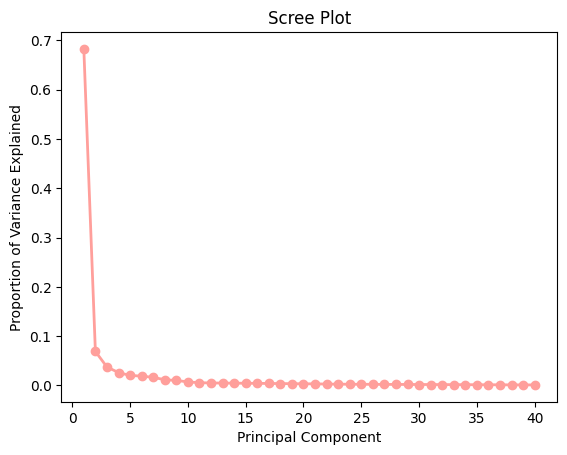

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-',
         linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, n_components + 1)]
df_pca = pd.DataFrame(data=x_pca, columns=columns)


# Concatenate the principal components with the target variable
df_final = pd.concat([df_pca, y], axis=1)

# Display the DataFrame with principal components and the target variable
print("DataFrame with Principal Components and Target Variable:")
print(df_final)

DataFrame with Principal Components and Target Variable:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.036780 -0.032669 -0.985523 -0.616626  0.106785  0.418655 -0.023899   
1    -0.048435 -0.695765 -0.942068 -0.752245  0.112462 -0.227690 -0.147595   
2    -0.001210 -0.332385 -0.619686 -0.786893 -0.059639 -0.205756  0.118132   
3     0.045592 -0.041155  0.278435 -0.551663  0.416220 -0.012603 -0.092190   
4    -0.074984 -0.083345  3.031641 -0.284328 -0.294930  0.212706 -0.160632   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.066615  0.105766  0.054060 -0.022213  0.430865 -0.921645 -0.462283   
1596 -0.040943 -0.673553  0.360095  0.333291  1.065458 -0.412643 -1.031244   
1597  0.044163 -0.040602  0.013133 -0.125484  0.693620 -0.331387 -0.877252   
1598 -0.114640 -1.318924 -0.411898  0.118545  0.075771 -0.272036 -1.018939   
1599 -0.133387 -0.085555 -0.179791  0.419631 -0.852179 -0.222331 -0.624540   

      

In [ ]:
df_final

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.036780 -0.032669 -0.985523 -0.616626  0.106785  0.418655 -0.023899   
1    -0.048435 -0.695765 -0.942068 -0.752245  0.112462 -0.227690 -0.147595   
2    -0.001210 -0.332385 -0.619686 -0.786893 -0.059639 -0.205756  0.118132   
3     0.045592 -0.041155  0.278435 -0.551663  0.416220 -0.012603 -0.092190   
4    -0.074984 -0.083345  3.031641 -0.284328 -0.294930  0.212706 -0.160632   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.066615  0.105766  0.054060 -0.022213  0.430865 -0.921645 -0.462283   
1596 -0.040943 -0.673553  0.360095  0.333291  1.065458 -0.412643 -1.031244   
1597  0.044163 -0.040602  0.013133 -0.125484  0.693620 -0.331387 -0.877252   
1598 -0.114640 -1.318924 -0.411898  0.118545  0.075771 -0.272036 -1.018939   
1599 -0.133387 -0.085555 -0.179791  0.419631 -0.852179 -0.222331 -0.624540   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     0.384213 -0.486383 -0.064385  0.510091 -0.242628 -0.382766  0.560314   
1     0.629664 -0.611218 -0.184142 -0.447660  0.092172  0.557024  0.063114   
2     0.082157 -0.835037 -0.082160 -0.103271  0.076020  0.248566  0.045632   
3    -0.514628 -1.169498 -0.062287  0.336853  0.063221  0.122269  0.092472   
4    -0.366365 -0.825472 -0.170021  0.083202  0.221453 -0.119001 -0.389932   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.334338  0.129710 -0.321159 -0.430971 -0.322714 -0.450536 -0.007526   
1596  0.257105  0.203028 -0.251016  0.035732 -0.056560  0.390630  0.084089   
1597  0.260867  0.292790 -0.229437  0.063171 -0.008172  0.065296 -0.196228   
1598  0.453114  0.094327 -0.202990 -0.105547  0.005684  0.057934 -0.143319   
1599 -0.197169 -0.734491  0.005027 -0.032287  0.355819 -0.125680 -0.046994   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0     0.033018 -0.236521  0.017916 -0.194675  0.205679  0.088662  0.064863   
1    -0.235081 -0.210352 -0.048232  0.069409  0.322347  0.357276  0.015538   
2     0.445079 -0.285221 -0.526534 -0.207681  0.347795  0.138366 -0.011167   
3     0.188861 -0.444190  0.450806 -0.234611  0.385530  0.053243 -0.250529   
4    -0.146255 -0.483483 -0.159511 -0.119208  0.389995  0.018459 -0.337812   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.039444  0.264765  0.047239 -0.194859 -0.044272  0.196552  0.387910   
1596 -0.501141  0.176764 -0.059137 -0.186491 -0.099236  0.136375  0.688089   
1597  0.343261  0.203611 -0.350793 -0.346266 -0.121068  0.085141  0.450968   
1598  0.170782  0.106475  0.489326 -0.017512  0.099732  0.454618  0.220350   
1599 -0.036119  0.230831  0.017795 -0.428159 -0.025391  0.102469 -0.005920   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0     0.069172 -0.002316  0.296367 -0.116201 -0.038613 -0.264643  0.436487   
1     0.190670 -0.043436  0.571757 -0.128191 -0.074203 -0.367711  0.512147   
2     0.434039  0.157365  0.064583  0.016843  0.086605 -0.157233  0.267612   
3     0.479893  0.124072 -0.134195  0.056954  0.048619 -0.061532  0.165857   
4     0.149227 -0.274106 -0.092244 -0.144616 -0.026886 -0.028396  0.112113   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.004879 -0.047835  0.390260 -0.185105  0.136479 -0.108397  0.185827   
1596  0.046907  0.058882  0.231701 -0.095987  0.162429 -0.059693  0.155403   
1597 -0.017228  0.027087  0.123472 -0.141379  0.206939 -0.018419  0.096626   
1598  0.000867 -0.012165  0.132514 -0.125917  0.254455  0.001086  0.133038   
1599 -0.124129 -0.026743 -0.061440 -0.270032  0.206471 -0.139021  0.270848   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0     0.030744 -0.160866  0.095804 -0.299075 -0.284562  0.061500 -0.119357   
1     0.068086 -0.090890  0.005876 -0.230703 -0.188098  0.069353 -0.015647   
2    -0.103229 -0.346145  0.0

In [ ]:
df_final.ICU.value_counts()

0.000000    1405
0.693147     195
Name: ICU, dtype: int64

after pca the ICU got to be float so I changed it to integer

In [ ]:
threshold = 0.5

# Convert continuous variable to binary using threshold
df_final.ICU= (df_final.ICU > threshold).astype(int)

# Display the original and transformed values
print("Original values:")
print(df_final.ICU.head())

print("\nTransformed values:")
print(df_final.ICU.head())

Original values:
0    0
1    0
2    0
3    0
4    1
Name: ICU, dtype: int64

Transformed values:
0    0
1    0
2    0
3    0
4    1
Name: ICU, dtype: int64


In [ ]:
df_final

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.036780 -0.032669 -0.985523 -0.616626  0.106785  0.418655 -0.023899   
1    -0.048435 -0.695765 -0.942068 -0.752245  0.112462 -0.227690 -0.147595   
2    -0.001210 -0.332385 -0.619686 -0.786893 -0.059639 -0.205756  0.118132   
3     0.045592 -0.041155  0.278435 -0.551663  0.416220 -0.012603 -0.092190   
4    -0.074984 -0.083345  3.031641 -0.284328 -0.294930  0.212706 -0.160632   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.066615  0.105766  0.054060 -0.022213  0.430865 -0.921645 -0.462283   
1596 -0.040943 -0.673553  0.360095  0.333291  1.065458 -0.412643 -1.031244   
1597  0.044163 -0.040602  0.013133 -0.125484  0.693620 -0.331387 -0.877252   
1598 -0.114640 -1.318924 -0.411898  0.118545  0.075771 -0.272036 -1.018939   
1599 -0.133387 -0.085555 -0.179791  0.419631 -0.852179 -0.222331 -0.624540   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     0.384213 -0.486383 -0.064385  0.510091 -0.242628 -0.382766  0.560314   
1     0.629664 -0.611218 -0.184142 -0.447660  0.092172  0.557024  0.063114   
2     0.082157 -0.835037 -0.082160 -0.103271  0.076020  0.248566  0.045632   
3    -0.514628 -1.169498 -0.062287  0.336853  0.063221  0.122269  0.092472   
4    -0.366365 -0.825472 -0.170021  0.083202  0.221453 -0.119001 -0.389932   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.334338  0.129710 -0.321159 -0.430971 -0.322714 -0.450536 -0.007526   
1596  0.257105  0.203028 -0.251016  0.035732 -0.056560  0.390630  0.084089   
1597  0.260867  0.292790 -0.229437  0.063171 -0.008172  0.065296 -0.196228   
1598  0.453114  0.094327 -0.202990 -0.105547  0.005684  0.057934 -0.143319   
1599 -0.197169 -0.734491  0.005027 -0.032287  0.355819 -0.125680 -0.046994   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0     0.033018 -0.236521  0.017916 -0.194675  0.205679  0.088662  0.064863   
1    -0.235081 -0.210352 -0.048232  0.069409  0.322347  0.357276  0.015538   
2     0.445079 -0.285221 -0.526534 -0.207681  0.347795  0.138366 -0.011167   
3     0.188861 -0.444190  0.450806 -0.234611  0.385530  0.053243 -0.250529   
4    -0.146255 -0.483483 -0.159511 -0.119208  0.389995  0.018459 -0.337812   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.039444  0.264765  0.047239 -0.194859 -0.044272  0.196552  0.387910   
1596 -0.501141  0.176764 -0.059137 -0.186491 -0.099236  0.136375  0.688089   
1597  0.343261  0.203611 -0.350793 -0.346266 -0.121068  0.085141  0.450968   
1598  0.170782  0.106475  0.489326 -0.017512  0.099732  0.454618  0.220350   
1599 -0.036119  0.230831  0.017795 -0.428159 -0.025391  0.102469 -0.005920   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0     0.069172 -0.002316  0.296367 -0.116201 -0.038613 -0.264643  0.436487   
1     0.190670 -0.043436  0.571757 -0.128191 -0.074203 -0.367711  0.512147   
2     0.434039  0.157365  0.064583  0.016843  0.086605 -0.157233  0.267612   
3     0.479893  0.124072 -0.134195  0.056954  0.048619 -0.061532  0.165857   
4     0.149227 -0.274106 -0.092244 -0.144616 -0.026886 -0.028396  0.112113   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.004879 -0.047835  0.390260 -0.185105  0.136479 -0.108397  0.185827   
1596  0.046907  0.058882  0.231701 -0.095987  0.162429 -0.059693  0.155403   
1597 -0.017228  0.027087  0.123472 -0.141379  0.206939 -0.018419  0.096626   
1598  0.000867 -0.012165  0.132514 -0.125917  0.254455  0.001086  0.133038   
1599 -0.124129 -0.026743 -0.061440 -0.270032  0.206471 -0.139021  0.270848   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0     0.030744 -0.160866  0.095804 -0.299075 -0.284562  0.061500 -0.119357   
1     0.068086 -0.090890  0.005876 -0.230703 -0.188098  0.069353 -0.015647   
2    -0.103229 -0.346145  0.0

In [ ]:
# checking NAn values after PCA
nan_values = df_final.isna().sum()

# Display columns with NaN values and their counts
print("Columns with NaN values and their counts:")
print(nan_values[nan_values > 0])

# Check if there are any NaN values in the entire dataset
if df.isna().values.any():
    print("Dataset contains NaN values.")
else:
    print("No NaN values found in the dataset.")

Columns with NaN values and their counts:
Series([], dtype: int64)
No NaN values found in the dataset.


# **AIF360 with modeling and hyperparameter tunning**

In [ ]:
!pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import GermanDataset, StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from sklearn.metrics import accuracy_score, roc_auc_score

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [ ]:
# Convert the DataFrame to an AIF360 dataset
from aif360.datasets import BinaryLabelDataset

aif360_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df_final,  # Assuming df_final is your preprocessed DataFrame
    label_names=['ICU'],
    protected_attribute_names=['GENDER']
)


In [ ]:
# Store definitions of priviledged and unpriviledged groups
privileged_groups = [{'GENDER': 1}]
unprivileged_groups = [{'GENDER': 0}]

In [ ]:
# Split original data into train and test data
train_orig, test_orig = aif360_dataset.split([0.8], shuffle=True, seed=10)
# Split training data in to training and validation data for hyperparameter tuning
train_orig, val_orig = train_orig.split([0.75], shuffle=True)

# Convert to dataframes
train_orig_df, _ = train_orig.convert_to_dataframe()
val_orig_df, _ = val_orig.convert_to_dataframe()
test_orig_df, _ = test_orig.convert_to_dataframe()

print("Train set: ", train_orig_df.shape)
print("Val set: ", val_orig_df.shape)
print("Test set: ", test_orig_df.shape)

Train set:  (960, 42)
Val set:  (320, 42)
Test set:  (320, 42)


In [ ]:
print(train_orig_df.columns)
train_orig_df.head()

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'GENDER', 'ICU'],
      dtype='object')


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
665 -0.048659 -0.703689 -0.505729 -0.906457  0.016274 -0.422394  0.035192   
708  0.012728 -0.146067 -0.655559  0.926865 -0.621650  0.121019 -0.611997   
619  0.017720  0.238207  0.000577  0.306809  1.427254 -0.306843 -0.823351   
80   0.074325  0.273700 -0.718254 -1.027018 -0.065728 -0.417396  0.056932   
718  0.151174  0.434348  0.602158 -0.297323 -0.019717 -0.238759 -0.068703   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
665  0.887941 -0.399503 -0.312286 -0.907279 -0.261894 -0.402347  0.230633   
708  0.818855  0.053464 -0.253996 -0.187400 -0.300448 -0.600638  0.318803   
619 -0.453808  0.002424 -0.421917 -0.059164  0.066751  0.083841 -0.098831   
80  -0.606256  0.614423  0.106521 -0.096530  0.161678  0.375527  0.143364   
718  0.870069  0.701237  0.040276 -1.130413  1.092667 -0.189493 -0.064006   

         PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
665  0.004230 -0.207790 -0.121000 -0.005029  0.137327  0.027547  0.415221   
708 -0.097678  0.078059  0.016356 -0.309817  0.251399 -0.664020  0.113143   
619  0.364356  0.094630 -0.324350 -0.214793 -0.196611 -0.210271 -0.169144   
80  -0.485438 -0.080366 -0.116645  0.147766 -0.129747  0.266420  0.161208   
718 -0.312337  0.091456  0.285772 -0.585643 -0.266506 -0.445073 -0.264180   

         PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
665  0.072195  0.066853 -0.106772  0.162183  0.164717 -0.181149 -0.159758   
708  0.025711 -0.171486 -0.070670  0.198207  0.026176  0.090413 -0.010933   
619  0.084034 -0.001513  0.126125 -0.179384  0.280862 -0.027765  0.095560   
80  -0.087269 -0.164081 -0.244401 -0.429286 -0.163064  0.106233 -0.310663   
718 -0.258455  0.703727  0.003446  0.068057 -0.140144 -0.151285 -0.336717   

         PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
665  0.165640  0.074390 -0.363126  0.263514  0.294390 -0.164061  0.098160   
708 -0.114617  0.201608  0.160537  0.075329 -0.060283  0.014365 -0.036592   
619 -0.328634 -0.209816 -0.279650 -0.048782  0.077868  0.105456  0.102846   
80  -0.122013  0.046214  0.154163  0.246598 -0.023729  0.166986  0.091772   
718 -0.007332  0.298585 -0.216516 -0.123909 -0.383238 -0.077871 -0.083444   

         PC36      PC37      PC38      PC39      PC40  GENDER  ICU  
665 -0.378066  0.133868  0.043884  0.048810 -0.221276     0.0  0.0  
708 -0.232329 -0.044689 -0.016901  0.115573 -0.149507     0.0  0.0  
619 -0.006136  0.066876  0.062427 -0.004093  0.042106     1.0  0.0  
80   0.012179  0.062205  0.036461  0.115152  0.008086     0.0  0.0  
718  0.083487 -0.176977 -0.025115 -0.180095  0.078336     1.0  0.0

In [ ]:
# calculating fairness matrics
train_orig_metrics = BinaryLabelDatasetMetric(train_orig,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Mean difference = %f" % train_orig_metrics.mean_difference())
print("Disparate Impact = %f" % train_orig_metrics.disparate_impact())

Mean difference = 0.045000
Disparate Impact = 1.450000


train a classifier to predit ICU usng the original data

In [ ]:
x_train = train_orig_df.drop("ICU", axis=1)
y_train = train_orig_df.ICU.replace({2:0})
print("Outcomes: ")
y_train.value_counts()

Outcomes: 


0.0    837
1.0    123
Name: ICU, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
# Set up the logistic regression model with the given hyperparameters
initial_lr = LogisticRegression(C=0.5, penalty="l1", solver='liblinear')

# Fit the model using the training data
initial_lr = initial_lr.fit(x_train, y_train, sample_weight=None)

Now that we have a trained model, we should evaluate it on our validation set. For now, we'll look the AUC as well as accuracy when we use a cutoff of 0.5 (that is, predicted values over 0.5 are interpreted as good credit, and vice versa).

Let's write a funciton to do that, too.

In [ ]:
def evaluate(model, X, y_true):
    '''Calculates the AUC and accuracy for a trained logistic regression model'''

    # Calculate predicted values
    y_pred = model.predict_proba(X)
    # This returns a tuple for each observation containing the probability of being in each class.
    # Since we're doing binary classification, all we need to know is the probability that the outcome = 1 (good credit)
    y_pred = [row[1] for row in y_pred] # This pulls the predicted probability that y = 1 for each observation

    # Calculate accuracy
    accuracy = accuracy_score(y_true, [pred_prob >= 0.5 for pred_prob in y_pred])

    # Calculate AUC
    auc = roc_auc_score(y_true, y_pred)

    return accuracy, auc

In [ ]:
# Before we call the function, we need to set up the validation data properly, the way we did for the training data.
x_val = val_orig_df.drop("ICU", axis=1)
y_val = val_orig_df.ICU.replace({2:0})

In [ ]:
accuracy, auc = evaluate(initial_lr, x_val, y_val)
print("Accuracy: ", accuracy)
print("AUC: ", auc)

Accuracy:  0.9125
AUC:  0.8426776475556963


**Hyperparameter tunning of logestic regression**

In [ ]:
def tune_logistic_regression(train_df, val_df, penalty_types, C_values, weights=None, verbose=True):
    '''Tunes logistic regression models over the hyperparameters penalty type and C
       to maximize the AUC'''
    # Pre-process the training and validation data
    x_train = train_df.drop("ICU", axis=1)
    y_train = train_df.ICU.replace({2:0})
    x_val = val_df.drop("ICU", axis=1)
    y_val = val_df.ICU.replace({2:0})

    # Create empty lists where we will store the results of hyperparameter tuning
    parameters = []
    models = []
    val_aucs = []

    # Loop through the hyperparameters of interest
    for penalty in penalty_types:
        for C in C_values:

            # Train the logistic regression model with the given hyperparameters
            lr = LogisticRegression(C=C, penalty=penalty, solver='liblinear')

            # Fit the model using the training data
            lr = lr.fit(x_train, y_train, sample_weight=weights)

            # Get the evalution metrics on the validation set
            accuracy, auc  = evaluate(lr, x_val, y_val)

            # Store the results
            parameters.append({'penalty': penalty, 'C': C})
            models.append(lr)
            val_aucs.append(auc)

            # Print the results
            if verbose:
                print("\nParmeters: \tpenalty={} \tC={}".format(penalty, C))
                print("Validtion AUC: {}".format(auc))


    # Determine the best model -- that is, the one with the AUC
    best_model_index = np.argmax(val_aucs)
    best_model = models[best_model_index]

    print("\nBest model parameters: ", parameters[best_model_index])
    print("Best model AUC: ", val_aucs[best_model_index])

    # Return best model
    return best_model, parameters, models, val_aucs

In [ ]:
best_lr, parameters, models, val_aucs = tune_logistic_regression(train_orig_df, val_orig_df, penalty_types=["l1", "l2"], C_values=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000])


Parmeters: 	penalty=l1 	C=0.001
Validtion AUC: 0.5

Parmeters: 	penalty=l1 	C=0.1
Validtion AUC: 0.8144863266814486

Parmeters: 	penalty=l1 	C=1
Validtion AUC: 0.839193326998205

Parmeters: 	penalty=l1 	C=10
Validtion AUC: 0.8206102840249181

Parmeters: 	penalty=l1 	C=100
Validtion AUC: 0.8190265019533313

Parmeters: 	penalty=l1 	C=1000
Validtion AUC: 0.8192376728962095

Parmeters: 	penalty=l1 	C=10000
Validtion AUC: 0.8193432583676487

Parmeters: 	penalty=l1 	C=100000
Validtion AUC: 0.8193432583676487

Parmeters: 	penalty=l2 	C=0.001
Validtion AUC: 0.7281174110442403

Parmeters: 	penalty=l2 	C=0.1
Validtion AUC: 0.838243057755253

Parmeters: 	penalty=l2 	C=1
Validtion AUC: 0.8276845106113399

Parmeters: 	penalty=l2 	C=10
Validtion AUC: 0.8208214549677965

Parmeters: 	penalty=l2 	C=100
Validtion AUC: 0.8190265019533313

Parmeters: 	penalty=l2 	C=1000
Validtion AUC: 0.8193432583676487

Parmeters: 	penalty=l2 	C=10000
Validtion AUC: 0.8193432583676487

Parmeters: 	penalty=l2 	C=100000
V

Let's plot the results so that we understand what hyperparameter tuning actually did.

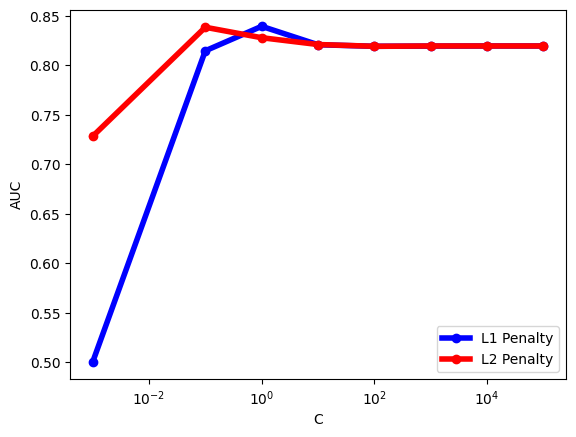

In [ ]:
val_aucs_l1 = [val_aucs[i] for i in range(len(val_aucs)) if parameters[i]['penalty']=="l1"]
val_aucs_l2 = [val_aucs[i] for i in range(len(val_aucs)) if parameters[i]['penalty']=="l2"]
C_values = [parameters[i]['C'] for i in range(len(parameters)) if parameters[i]['penalty']=="l2"]

fig, ax = plt.subplots()
ax.semilogx( C_values, val_aucs_l1, marker='.', markerfacecolor='blue', markersize=12, color='blue', linewidth=4, label='L1 Penalty')
ax.semilogx( C_values, val_aucs_l2, marker='.', markerfacecolor='red', markersize=12, color='red', linewidth=4, label='L2 Penalty')
ax.set_xlabel("C")
ax.set_ylabel("AUC")
plt.legend()
plt.show()

**Evaluating bias in our predictions**

Let's put our data back into a aif360 dataset format, so that we can use all of the fairness metrics provided by the package. For now, we'll evaluate bias on the training data. This mimics the development process we'd use in any real application.

First, we'll get predicted values using the best model and attach them as a new column in the data frame. We'll use 0.5 as the threshold as before.

In [ ]:
# Copy the dataset
train_preds_df = train_orig_df.copy()
# Calculate predicted values
train_preds_df['ICU'] = best_lr.predict(x_train)
# Recode the predictions so that they match the format that the dataset was originally provided in
# (1 = good credit, 2 = bad credit)
#train_preds_df['ICU'] = train_preds_df.ICU.replace({0:2})

In [ ]:
train_orig_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
665  -0.048659 -0.703689 -0.505729 -0.906457  0.016274 -0.422394  0.035192   
708   0.012728 -0.146067 -0.655559  0.926865 -0.621650  0.121019 -0.611997   
619   0.017720  0.238207  0.000577  0.306809  1.427254 -0.306843 -0.823351   
80    0.074325  0.273700 -0.718254 -1.027018 -0.065728 -0.417396  0.056932   
718   0.151174  0.434348  0.602158 -0.297323 -0.019717 -0.238759 -0.068703   
...        ...       ...       ...       ...       ...       ...       ...   
758  -0.013707 -0.409065 -0.195098  1.550112 -0.544841 -0.683053  0.366079   
450   0.102900  0.275700  0.276880 -1.457295 -0.181509  0.344613  0.813476   
1405 -0.166522 -0.144136  0.198173 -0.094614 -1.168244 -0.290600 -0.419988   
112   0.074191  0.108566 -0.110783 -0.511104  0.473535  1.034465 -0.838067   
172   0.030407 -0.051191 -1.329113 -0.125099  0.007099  0.348333 -0.759413   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
665   0.887941 -0.399503 -0.312286 -0.907279 -0.261894 -0.402347  0.230633   
708   0.818855  0.053464 -0.253996 -0.187400 -0.300448 -0.600638  0.318803   
619  -0.453808  0.002424 -0.421917 -0.059164  0.066751  0.083841 -0.098831   
80   -0.606256  0.614423  0.106521 -0.096530  0.161678  0.375527  0.143364   
718   0.870069  0.701237  0.040276 -1.130413  1.092667 -0.189493 -0.064006   
...        ...       ...       ...       ...       ...       ...       ...   
758   0.815856  0.054884 -0.217529  0.300335  0.290893 -0.077797 -0.224911   
450   0.728466  0.115707 -0.137097 -0.362553  0.481440 -0.099742 -0.593278   
1405 -0.599422 -0.241054 -0.052924  0.048618 -0.231302  0.119239 -0.226620   
112   0.765466  0.038776 -0.222065 -0.331825 -0.141015  0.029689 -0.323318   
172   0.002303  0.128421  0.074262  0.034073  0.262747  0.194391  0.142461   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
665   0.004230 -0.207790 -0.121000 -0.005029  0.137327  0.027547  0.415221   
708  -0.097678  0.078059  0.016356 -0.309817  0.251399 -0.664020  0.113143   
619   0.364356  0.094630 -0.324350 -0.214793 -0.196611 -0.210271 -0.169144   
80   -0.485438 -0.080366 -0.116645  0.147766 -0.129747  0.266420  0.161208   
718  -0.312337  0.091456  0.285772 -0.585643 -0.266506 -0.445073 -0.264180   
...        ...       ...       ...       ...       ...       ...       ...   
758   0.453164  0.307544 -0.112530 -0.559682 -0.606454  0.067748  0.680738   
450   0.446905  0.749253 -0.168872  0.341276 -0.075506 -0.555281  0.258999   
1405 -0.071480  0.091253 -0.132391 -0.042764  0.465609  0.010448  0.150558   
112   0.263454 -0.100996 -0.540365 -0.127843  0.100834  0.226707 -0.027730   
172  -0.416049  0.057821  0.149840 -0.200585 -0.350814 -0.279136 -0.007305   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
665   0.072195  0.066853 -0.106772  0.162183  0.164717 -0.181149 -0.159758   
708   0.025711 -0.171486 -0.070670  0.198207  0.026176  0.090413 -0.010933   
619   0.084034 -0.001513  0.126125 -0.179384  0.280862 -0.027765  0.095560   
80   -0.087269 -0.164081 -0.244401 -0.429286 -0.163064  0.106233 -0.310663   
718  -0.258455  0.703727  0.003446  0.068057 -0.140144 -0.151285 -0.336717   
...        ...       ...       ...       ...       ...       ...       ...   
758   0.011887 -0.136428  0.278278 -0.027095  0.388387 -0.002424  0.187116   
450  -0.018004 -0.135877  0.012727 -0.062863  0.000545  0.060489 -0.222537   
1405 -0.405845 -0.390366  0.104623  0.143700 -0.027827 -0.076464  0.008192   
112  -0.226487  0.020224 -0.176580 -0.197088  0.032893  0.044471 -0.159709   
172  -0.122883 -0.115925  0.090954 -0.106741  0.294082  0.038043  0.234756   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
665   0.165640  0.074390 -0.363126  0.263514  0.294390 -0.164061  0.098160   
708  -0.114617  0.201608  0.160537  0.075329 -0.060283  0.014365 -0.036592   
619  -0.328634 -0.209816 -0.2

In [ ]:
train_preds_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
665  -0.048659 -0.703689 -0.505729 -0.906457  0.016274 -0.422394  0.035192   
708   0.012728 -0.146067 -0.655559  0.926865 -0.621650  0.121019 -0.611997   
619   0.017720  0.238207  0.000577  0.306809  1.427254 -0.306843 -0.823351   
80    0.074325  0.273700 -0.718254 -1.027018 -0.065728 -0.417396  0.056932   
718   0.151174  0.434348  0.602158 -0.297323 -0.019717 -0.238759 -0.068703   
...        ...       ...       ...       ...       ...       ...       ...   
758  -0.013707 -0.409065 -0.195098  1.550112 -0.544841 -0.683053  0.366079   
450   0.102900  0.275700  0.276880 -1.457295 -0.181509  0.344613  0.813476   
1405 -0.166522 -0.144136  0.198173 -0.094614 -1.168244 -0.290600 -0.419988   
112   0.074191  0.108566 -0.110783 -0.511104  0.473535  1.034465 -0.838067   
172   0.030407 -0.051191 -1.329113 -0.125099  0.007099  0.348333 -0.759413   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
665   0.887941 -0.399503 -0.312286 -0.907279 -0.261894 -0.402347  0.230633   
708   0.818855  0.053464 -0.253996 -0.187400 -0.300448 -0.600638  0.318803   
619  -0.453808  0.002424 -0.421917 -0.059164  0.066751  0.083841 -0.098831   
80   -0.606256  0.614423  0.106521 -0.096530  0.161678  0.375527  0.143364   
718   0.870069  0.701237  0.040276 -1.130413  1.092667 -0.189493 -0.064006   
...        ...       ...       ...       ...       ...       ...       ...   
758   0.815856  0.054884 -0.217529  0.300335  0.290893 -0.077797 -0.224911   
450   0.728466  0.115707 -0.137097 -0.362553  0.481440 -0.099742 -0.593278   
1405 -0.599422 -0.241054 -0.052924  0.048618 -0.231302  0.119239 -0.226620   
112   0.765466  0.038776 -0.222065 -0.331825 -0.141015  0.029689 -0.323318   
172   0.002303  0.128421  0.074262  0.034073  0.262747  0.194391  0.142461   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
665   0.004230 -0.207790 -0.121000 -0.005029  0.137327  0.027547  0.415221   
708  -0.097678  0.078059  0.016356 -0.309817  0.251399 -0.664020  0.113143   
619   0.364356  0.094630 -0.324350 -0.214793 -0.196611 -0.210271 -0.169144   
80   -0.485438 -0.080366 -0.116645  0.147766 -0.129747  0.266420  0.161208   
718  -0.312337  0.091456  0.285772 -0.585643 -0.266506 -0.445073 -0.264180   
...        ...       ...       ...       ...       ...       ...       ...   
758   0.453164  0.307544 -0.112530 -0.559682 -0.606454  0.067748  0.680738   
450   0.446905  0.749253 -0.168872  0.341276 -0.075506 -0.555281  0.258999   
1405 -0.071480  0.091253 -0.132391 -0.042764  0.465609  0.010448  0.150558   
112   0.263454 -0.100996 -0.540365 -0.127843  0.100834  0.226707 -0.027730   
172  -0.416049  0.057821  0.149840 -0.200585 -0.350814 -0.279136 -0.007305   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
665   0.072195  0.066853 -0.106772  0.162183  0.164717 -0.181149 -0.159758   
708   0.025711 -0.171486 -0.070670  0.198207  0.026176  0.090413 -0.010933   
619   0.084034 -0.001513  0.126125 -0.179384  0.280862 -0.027765  0.095560   
80   -0.087269 -0.164081 -0.244401 -0.429286 -0.163064  0.106233 -0.310663   
718  -0.258455  0.703727  0.003446  0.068057 -0.140144 -0.151285 -0.336717   
...        ...       ...       ...       ...       ...       ...       ...   
758   0.011887 -0.136428  0.278278 -0.027095  0.388387 -0.002424  0.187116   
450  -0.018004 -0.135877  0.012727 -0.062863  0.000545  0.060489 -0.222537   
1405 -0.405845 -0.390366  0.104623  0.143700 -0.027827 -0.076464  0.008192   
112  -0.226487  0.020224 -0.176580 -0.197088  0.032893  0.044471 -0.159709   
172  -0.122883 -0.115925  0.090954 -0.106741  0.294082  0.038043  0.234756   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
665   0.165640  0.074390 -0.363126  0.263514  0.294390 -0.164061  0.098160   
708  -0.114617  0.201608  0.160537  0.075329 -0.060283  0.014365 -0.036592   
619  -0.328634 -0.209816 -0.2

In [ ]:
orig_aif360 = StandardDataset(train_orig_df, label_name='ICU', protected_attribute_names=['GENDER'],
                privileged_classes=[[1]], favorable_classes=[1])
preds_aif360 = StandardDataset(train_preds_df, label_name='ICU', protected_attribute_names=['GENDER'],
                privileged_classes=[[1]], favorable_classes=[1])

In [ ]:
#calculating fairness metrics
pred_metrics = BinaryLabelDatasetMetric(preds_aif360,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Mean difference = %f" % pred_metrics.mean_difference())
print("Disparate Impact = %f" % pred_metrics.disparate_impact())

Mean difference = 0.019444
Disparate Impact = 1.500000


We should therefore not find it surprising that we have bias in a model trained on that data.

Now, since we have true values and predicted values, let's compare the true positive rate and false positive rate by group. This is similar to the analysis ProPublica did.

Note that aif360 is pretty picky about what goes into this ClassificationMetric class, which is the reason for all the inefficient copying of datasets above.

In [ ]:
orig_vs_preds_metrics = ClassificationMetric(orig_aif360, preds_aif360,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)

print("\nError rate difference (unprivileged error rate - privileged error rate)= %f" % orig_vs_preds_metrics.error_rate_difference())


print("\nFalse negative rate for privledged groups = %f" % orig_vs_preds_metrics.false_negative_rate(privileged=True))
print("False negative rate for unprivledged groups = %f" % orig_vs_preds_metrics.false_negative_rate(privileged=False))
print("False negative rate ratio = %f" % orig_vs_preds_metrics.false_negative_rate_ratio())


print("\nFalse positive rate for privledged groups = %f" % orig_vs_preds_metrics.false_positive_rate(privileged=True))
print("False positive rate for unprivledged groups = %f" % orig_vs_preds_metrics.false_positive_rate(privileged=False))
print("False positive rate ratio = %f" % orig_vs_preds_metrics.false_positive_rate_ratio())



Error rate difference (unprivileged error rate - privileged error rate)= 0.035556

False negative rate for privledged groups = 0.694444
False negative rate for unprivledged groups = 0.689655
False negative rate ratio = 0.993103

False positive rate for privledged groups = 0.009259
False positive rate for unprivledged groups = 0.015595
False positive rate ratio = 1.684211


This confirms it: our model is even *more* biased than the original.  

Let's try to fix that.

**Train a classifier to predict ICU using the original data, excluding the sensitive feature**

In [ ]:
best_lr_noage, _, _, _ = tune_logistic_regression(train_orig_df.drop('GENDER', axis=1), val_orig_df.drop('GENDER', axis=1),
                                                                       penalty_types=["l1", "l2"], C_values=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000], verbose=False)



Best model parameters:  {'penalty': 'l2', 'C': 0.1}
Best model AUC:  0.8535529511139267


Now let's check the same bias metrics again.

In [ ]:
preds_df_noage = train_orig_df.copy()
preds_df_noage['ICU'] = best_lr_noage.predict(x_train.drop('GENDER', axis=1))


In [ ]:
noage_preds_aif360 = StandardDataset(preds_df_noage, label_name='ICU', protected_attribute_names=['GENDER'],
                privileged_classes=[[1]], favorable_classes=[1])


noage_preds_metrics = BinaryLabelDatasetMetric(noage_preds_aif360,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Mean difference = %f" % noage_preds_metrics.mean_difference())
print("Disparate Impact = %f" % noage_preds_metrics.disparate_impact())

orig_vs_noage_preds_metrics = ClassificationMetric(orig_aif360, noage_preds_aif360,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)

print("\nError rate difference (unprivileged error rate - privileged error rate)= %f" % orig_vs_noage_preds_metrics.error_rate_difference())


print("\nFalse negative rate for privledged groups = %f" % orig_vs_noage_preds_metrics.false_negative_rate(privileged=True))
print("False negative rate for unprivledged groups = %f" % orig_vs_noage_preds_metrics.false_negative_rate(privileged=False))
print("False negative rate ratio = %f" % orig_vs_noage_preds_metrics.false_negative_rate_ratio())


print("\nFalse positive rate for privledged groups = %f" % orig_vs_noage_preds_metrics.false_positive_rate(privileged=True))
print("False positive rate for unprivledged groups = %f" % orig_vs_noage_preds_metrics.false_positive_rate(privileged=False))
print("False positive rate ratio = %f" % orig_vs_noage_preds_metrics.false_positive_rate_ratio())


Mean difference = 0.017222
Disparate Impact = 1.620000

Error rate difference (unprivileged error rate - privileged error rate)= 0.026667

False negative rate for privledged groups = 0.777778
False negative rate for unprivledged groups = 0.724138
False negative rate ratio = 0.931034

False positive rate for privledged groups = 0.006173
False positive rate for unprivledged groups = 0.005848
False positive rate ratio = 0.947368


how do these numbers for our model that doesn't use age compare to the model that *does* use it?

Which figures are encoding the same information as age?

Note that the AUC of our best model is *slightly* worse than before: by excluding a feature, we've lost some predictive power.

**Preprocess the data using the reweighting algorithm, then train a classifier to predict ICU using the re-weighted data**

In [ ]:
# Fit the weights to our training data
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW_fit = RW.fit(train_orig)

In [ ]:
# Pull the actual values of the weights for the training data
train_reweighed = RW_fit.transform(train_orig)
training_weights = train_reweighed.instance_weights
training_weights

array([1.01973684, 1.01973684, 0.96875   , 1.01973684, 0.96875   ,
       1.01973684, 1.01973684, 0.88362069, 1.01973684, 1.28125   ,
       1.01973684, 1.28125   , 1.01973684, 1.01973684, 1.01973684,
       0.96875   , 0.96875   , 0.96875   , 0.96875   , 1.01973684,
       1.01973684, 1.01973684, 1.01973684, 0.96875   , 0.96875   ,
       0.96875   , 1.01973684, 1.01973684, 1.01973684, 0.96875   ,
       1.01973684, 1.01973684, 0.88362069, 0.96875   , 1.01973684,
       1.28125   , 0.96875   , 1.01973684, 0.96875   , 1.01973684,
       1.01973684, 1.01973684, 1.01973684, 1.01973684, 1.01973684,
       1.01973684, 1.01973684, 0.96875   , 0.96875   , 1.01973684,
       1.01973684, 0.88362069, 1.01973684, 1.01973684, 0.96875   ,
       1.01973684, 1.01973684, 1.01973684, 1.01973684, 1.01973684,
       1.01973684, 0.96875   , 0.96875   , 0.96875   , 0.96875   ,
       0.96875   , 1.01973684, 0.88362069, 0.96875   , 1.01973684,
       0.96875   , 1.01973684, 0.88362069, 0.96875   , 0.96875

In [ ]:
# Train a model using weights
best_lr_weights, _, _, _ = tune_logistic_regression(train_orig_df.drop('GENDER', axis=1), val_orig_df.drop('GENDER', axis=1),
                                                                       penalty_types=["l1", "l2"], C_values=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
                                                                       weights=training_weights, verbose=False)


Best model parameters:  {'penalty': 'l2', 'C': 0.1}
Best model AUC:  0.8464787245275049


our AUC fell again. As we've discussed, there's often a tradeoff between fairness and other metrics that stakeholders care about.

Let's see if the fairness metrics changed.

In [ ]:
train_preds_df_weights = train_orig_df.copy()
train_preds_df_weights['ICU'] = best_lr_weights.predict(x_train.drop('GENDER', axis=1))

In [ ]:
preds_weights_aif360 = StandardDataset(train_preds_df_weights, label_name='ICU', protected_attribute_names=['GENDER'],
                privileged_classes=[[1]], favorable_classes=[1])
preds_weights_metrics = BinaryLabelDatasetMetric(preds_weights_aif360,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Mean difference = %f" % preds_weights_metrics.mean_difference())
print("Disparate Impact = %f" % preds_weights_metrics.disparate_impact())

orig_vs_preds_weights_metrics = ClassificationMetric(orig_aif360, preds_weights_aif360,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)

print("\nError rate difference (unprivileged error rate - privileged error rate)= %f" % orig_vs_preds_weights_metrics.error_rate_difference())

print("\nFalse negative rate for privledged groups = %f" % orig_vs_preds_weights_metrics.false_negative_rate(privileged=True))
print("False negative rate for unprivledged groups = %f" % orig_vs_preds_weights_metrics.false_negative_rate(privileged=False))
print("False negative rate ratio = %f" % orig_vs_preds_weights_metrics.false_negative_rate_ratio())


print("\nFalse positive rate for privledged groups = %f" % orig_vs_preds_weights_metrics.false_positive_rate(privileged=True))
print("False positive rate for unprivledged groups = %f" % orig_vs_preds_weights_metrics.false_positive_rate(privileged=False))
print("False positive rate ratio = %f" % orig_vs_preds_weights_metrics.false_positive_rate_ratio())


Mean difference = 0.014444
Disparate Impact = 1.472727

Error rate difference (unprivileged error rate - privileged error rate)= 0.023889

False negative rate for privledged groups = 0.777778
False negative rate for unprivledged groups = 0.724138
False negative rate ratio = 0.931034

False positive rate for privledged groups = 0.009259
False positive rate for unprivledged groups = 0.005848
False positive rate ratio = 0.631579


**Post-process the predictions from the model that we trained using weights by using the calibrated equality of odds algorithm **

In [ ]:
# Transform our predictions using the aif360 implementation of the equality of odds algorithm
eq_odds = EqOddsPostprocessing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups, seed=47)
preds_weights_eq_odds_aif360 = eq_odds.fit_predict(orig_aif360, preds_weights_aif360)

In [ ]:
# Calculate fairness metrics
preds_weights_eq_odds_metrics = BinaryLabelDatasetMetric(preds_weights_eq_odds_aif360,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Mean difference = %f" % preds_weights_eq_odds_metrics.mean_difference())
print("Disparate Impact = %f" % preds_weights_eq_odds_metrics.disparate_impact())

orig_vs_preds_weights_eq_odds_metrics = ClassificationMetric(orig_aif360, preds_weights_eq_odds_aif360,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)

print("\nError rate difference (unprivileged error rate - privileged error rate)= %f" % orig_vs_preds_weights_eq_odds_metrics.error_rate_difference())

print("\nFalse negative rate for privledged groups = %f" % orig_vs_preds_weights_eq_odds_metrics.false_negative_rate(privileged=True))
print("False negative rate for unprivledged groups = %f" % orig_vs_preds_weights_eq_odds_metrics.false_negative_rate(privileged=False))
print("False negative rate ratio = %f" % orig_vs_preds_weights_eq_odds_metrics.false_negative_rate_ratio())


print("\nFalse positive rate for privledged groups = %f" % orig_vs_preds_weights_eq_odds_metrics.false_positive_rate(privileged=True))
print("False positive rate for unprivledged groups = %f" % orig_vs_preds_weights_eq_odds_metrics.false_positive_rate(privileged=False))
print("False positive rate ratio = %f" % orig_vs_preds_weights_eq_odds_metrics.false_positive_rate_ratio())


Mean difference = 0.009444
Disparate Impact = 1.309091

Error rate difference (unprivileged error rate - privileged error rate)= 0.028889

False negative rate for privledged groups = 0.777778
False negative rate for unprivledged groups = 0.758621
False negative rate ratio = 0.975369

False positive rate for privledged groups = 0.009259
False positive rate for unprivledged groups = 0.005848
False positive rate ratio = 0.631579


In [ ]:
# Test how accuracy has changed
print("\nAccuracy (on training data) before equality of odds algorithm = %f" % orig_vs_preds_weights_metrics.accuracy())
print("\nAccuracy (on training data) after equality of odds algorithm = %f" % orig_vs_preds_weights_eq_odds_metrics.accuracy())


Accuracy (on training data) before equality of odds algorithm = 0.898958

Accuracy (on training data) after equality of odds algorithm = 0.895833


# ***Modeling***

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Extract features (X) and target variable (y)
X = df_final.drop(['ICU'], axis=1)
y = df_final['ICU']

# Step 1: Split the data using ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in shuffle_split.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [ ]:
# Step 2: Apply three classification models - RandomForestClassifier, LogisticRegression, and SVC

# Model 1: RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
print("RandomForestClassifier Accuracy:", rf_accuracy)
print("RandomForestClassifier Precision:", rf_precision)
print("RandomForestClassifier Recall:", rf_recall)
print("RandomForestClassifier F1-score:", rf_f1)

# Model 2: LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
print("LogisticRegression Accuracy:", lr_accuracy)
print("LogisticRegression Precision:", lr_precision)
print("LogisticRegression Recall:", lr_recall)
print("LogisticRegression F1-score:", lr_f1)

# Model 3: Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)
print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier Precision:", svc_precision)
print("Support Vector Classifier Recall:", svc_recall)
print("Support Vector Classifier F1-score:", svc_f1)

RandomForestClassifier Accuracy: 0.88125
RandomForestClassifier Precision: 0.6666666666666666
RandomForestClassifier Recall: 0.19047619047619047
RandomForestClassifier F1-score: 0.2962962962962963
LogisticRegression Accuracy: 0.86875
LogisticRegression Precision: 0.5
LogisticRegression Recall: 0.23809523809523808
LogisticRegression F1-score: 0.3225806451612903
Support Vector Classifier Accuracy: 0.89375
Support Vector Classifier Precision: 1.0
Support Vector Classifier Recall: 0.19047619047619047
Support Vector Classifier F1-score: 0.32


In [ ]:
# Create a DataFrame to store the metrics
metrics_data = {
    'Model': ['RandomForest', 'LogisticRegression', 'SVC'],
    'Accuracy': [rf_accuracy, lr_accuracy, svc_accuracy],
    'Precision': [rf_precision, lr_precision, svc_precision],
    'Recall': [rf_recall, lr_recall, svc_recall],
    'F1-score': [rf_f1, lr_f1, svc_f1]
}


In [ ]:
metrics_df = pd.DataFrame(metrics_data)

In [ ]:
# Display the metrics table
print("Metrics for each model:")
print(metrics_df)

Metrics for each model:
                Model  Accuracy  Precision    Recall  F1-score
0        RandomForest   0.88125   0.666667  0.190476  0.296296
1  LogisticRegression   0.86875   0.500000  0.238095  0.322581
2                 SVC   0.89375   1.000000  0.190476  0.320000


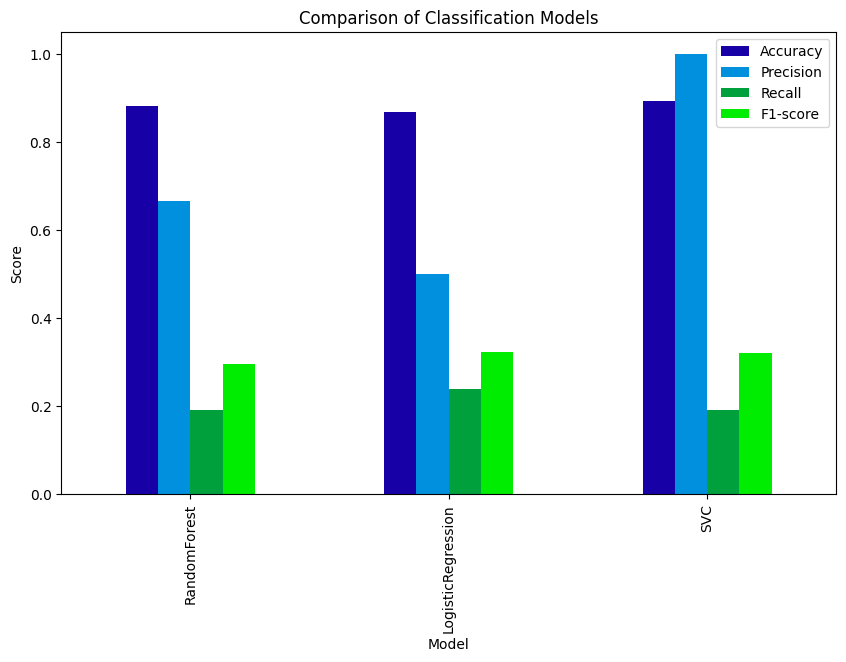

The best model based on accuracy is: SVC


In [ ]:
# Create a bar plot to visualize the metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.show()

# Determine the best model based on a chosen metric (e.g., accuracy)
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
print(f"The best model based on accuracy is: {best_model}")

# **Hyperparameter tunning and model evaluation**

I did hyperparameter tunning and model evaluation with both gridsearchcv and croos_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def tune_logistic_regression(X_train, y_train, penalty_types, C_values, weights=None, verbose=True):
    '''Tunes logistic regression models over the hyperparameters penalty type and C
       to maximize the AUC using cross-validation'''

    # Create empty lists where we will store the results of hyperparameter tuning
    parameters = []
    models = []
    val_aucs = []
    val_accuracies = []

    # Loop through the hyperparameters of interest
    for penalty in penalty_types:
        for C in C_values:

            # Train the logistic regression model with the given hyperparameters
            lr = LogisticRegression(C=C, penalty=penalty, solver='liblinear')

            # Perform cross-validation
            auc_scores = cross_val_score(lr, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
            accuracy_scores = cross_val_score(lr, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

            # Store the results
            parameters.append({'penalty': penalty, 'C': C})
            models.append(lr)
            val_aucs.append(np.mean(auc_scores))
            val_accuracies.append(np.mean(accuracy_scores))

            # Print the results
            if verbose:
                print("\nParameters: \tpenalty={} \tC={}".format(penalty, C))
                print("Cross-Validation Mean AUC: {}".format(np.mean(auc_scores)))
                print("Cross-Validation Mean Accuracy: {}".format(np.mean(accuracy_scores)))

    # Determine the best model -- that is, the one with the highest mean AUC
    best_model_index = np.argmax(val_aucs)
    best_model = models[best_model_index]

    print("\nBest model parameters: ", parameters[best_model_index])
    print("Best model Cross-Validation Mean AUC: ", val_aucs[best_model_index])
    print("Best model Cross-Validation Mean Accuracy: ", val_accuracies[best_model_index])

    # Return the best model
    return best_model, parameters, models, val_aucs, val_accuracies

# Example usage:
penalty_types = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10]

best_model, best_params, all_models, val_aucs, val_accuracies = tune_logistic_regression(X_train, y_train, penalty_types, C_values)



Parameters: 	penalty=l1 	C=0.01
Cross-Validation Mean AUC: 0.5
Cross-Validation Mean Accuracy: 0.8804686039735682

Parameters: 	penalty=l1 	C=0.1
Cross-Validation Mean AUC: 0.7346694942752515
Cross-Validation Mean Accuracy: 0.8968730415278556

Parameters: 	penalty=l1 	C=1
Cross-Validation Mean AUC: 0.7827774996523432
Cross-Validation Mean Accuracy: 0.8976500166756458

Parameters: 	penalty=l1 	C=10
Cross-Validation Mean AUC: 0.7814056459463217
Cross-Validation Mean Accuracy: 0.8898399504495095

Parameters: 	penalty=l2 	C=0.01
Cross-Validation Mean AUC: 0.7444648866638853
Cross-Validation Mean Accuracy: 0.8953172587437191

Parameters: 	penalty=l2 	C=0.1
Cross-Validation Mean AUC: 0.7827159875770638
Cross-Validation Mean Accuracy: 0.8992131294140068

Parameters: 	penalty=l2 	C=1
Cross-Validation Mean AUC: 0.7843430677235433
Cross-Validation Mean Accuracy: 0.8953044313238264

Parameters: 	penalty=l2 	C=10
Cross-Validation Mean AUC: 0.7814054141751262
Cross-Validation Mean Accuracy: 0.8898

In [ ]:
# Model 2: Logistic Regression with Hyperparameter Tuning
lr_model = LogisticRegression()
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Adjust the range based on your specific problem
}

lr_grid_search = GridSearchCV(lr_model, lr_param_grid, scoring='accuracy', cv=3)
lr_grid_search.fit(X_train, y_train)

lr_best_model = lr_grid_search.best_estimator_
lr_predictions = lr_best_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Best Accuracy:", lr_accuracy)
print("Best Parameters:", lr_grid_search.best_params_)

Logistic Regression Best Accuracy: 0.88125
Best Parameters: {'C': 0.1}


so the cross val score is better than gridsearchcv

In [ ]:
def tune_random_forest(X_train, y_train, param_grid, weights=None, cv=3, verbose=True):
    '''Tunes Random Forest models over the hyperparameters using cross-validation'''

    # Create empty lists where we will store the results of hyperparameter tuning
    parameters = []
    models = []
    val_accuracies = []

    # Loop through the hyperparameters of interest
    for params in param_grid:
        # Train the Random Forest model with the given hyperparameters
        rf_model = RandomForestClassifier(**params)

        # Perform cross-validation
        accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

        # Store the results
        parameters.append(params)
        models.append(rf_model)
        val_accuracies.append(np.mean(accuracy_scores))

        # Print the results
        if verbose:
            print("\nParameters: {}".format(params))
            print("Cross-Validation Mean Accuracy: {}".format(np.mean(accuracy_scores)))

    # Determine the best model -- that is, the one with the highest mean accuracy
    best_model_index = np.argmax(val_accuracies)
    best_model = models[best_model_index]

    print("\nBest model parameters: ", parameters[best_model_index])
    print("Best model Cross-Validation Mean Accuracy: ", val_accuracies[best_model_index])

    # Return the best model, best parameters, and all models
    return best_model, parameters, models, val_accuracies

# Example usage:
param_grid = [
    {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4}
]

best_rf_model, best_rf_params, all_rf_models, val_accuracies = tune_random_forest(X_train, y_train, param_grid)



Parameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Cross-Validation Mean Accuracy: 0.9000010994931337

Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
Cross-Validation Mean Accuracy: 0.9031273249698556

Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4}
Cross-Validation Mean Accuracy: 0.9046904377082164

Best model parameters:  {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4}
Best model Cross-Validation Mean Accuracy:  0.9046904377082164


In [ ]:
# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Accuracy: 0.8875


In [ ]:
def tune_svc(X_train, y_train, param_grid, weights=None, cv=3, verbose=True):
    '''Tunes Support Vector Classifier (SVC) models over the hyperparameters using cross-validation'''

    # Create empty lists where we will store the results of hyperparameter tuning
    parameters = []
    models = []
    val_accuracies = []

    # Loop through the hyperparameters of interest
    for params in param_grid:
        # Train the SVC model with the given hyperparameters
        svc_model = SVC(**params)

        # Perform cross-validation
        accuracy_scores = cross_val_score(svc_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

        # Store the results
        parameters.append(params)
        models.append(svc_model)
        val_accuracies.append(np.mean(accuracy_scores))

        # Print the results
        if verbose:
            print("\nParameters: {}".format(params))
            print("Cross-Validation Mean Accuracy: {}".format(np.mean(accuracy_scores)))

    # Determine the best model -- that is, the one with the highest mean accuracy
    best_model_index = np.argmax(val_accuracies)
    best_model = models[best_model_index]

    print("\nBest model parameters: ", parameters[best_model_index])
    print("Best model Cross-Validation Mean Accuracy: ", val_accuracies[best_model_index])

    # Return the best model, best parameters, and all models
    return best_model, parameters, models, val_accuracies

# Example usage:
svc_param_grid = [
    {'C': 0.001, 'kernel': 'linear'},
    {'C': 0.01, 'kernel': 'linear'},
    {'C': 0.1, 'kernel': 'linear'},
    {'C': 1, 'kernel': 'linear'},
    {'C': 10, 'kernel': 'linear'},
    {'C': 100, 'kernel': 'linear'},
    {'C': 200, 'kernel': 'linear'},
    {'C': 0.001, 'kernel': 'rbf'},
    {'C': 0.01, 'kernel': 'rbf'},
    {'C': 0.1, 'kernel': 'rbf'},
    {'C': 1, 'kernel': 'rbf'},
    {'C': 10, 'kernel': 'rbf'},
    {'C': 100, 'kernel': 'rbf'},
    {'C': 200, 'kernel': 'rbf'},
    {'C': 0.001, 'kernel': 'poly'},
    {'C': 0.01, 'kernel': 'poly'},
    {'C': 0.1, 'kernel': 'poly'},
    {'C': 1, 'kernel': 'poly'},
    {'C': 10, 'kernel': 'poly'},
    {'C': 100, 'kernel': 'poly'},
    {'C': 200, 'kernel': 'poly'},
]

best_svc_model, best_svc_params, all_svc_models, val_accuracies = tune_svc(X_train, y_train, svc_param_grid)



Parameters: {'C': 0.001, 'kernel': 'linear'}
Cross-Validation Mean Accuracy: 0.8804686039735682

Parameters: {'C': 0.01, 'kernel': 'linear'}
Cross-Validation Mean Accuracy: 0.8804686039735682

Parameters: {'C': 0.1, 'kernel': 'linear'}
Cross-Validation Mean Accuracy: 0.8921892007784411

Parameters: {'C': 1, 'kernel': 'linear'}
Cross-Validation Mean Accuracy: 0.8984306568005483

Parameters: {'C': 10, 'kernel': 'linear'}
Cross-Validation Mean Accuracy: 0.896088736425841

Parameters: {'C': 100, 'kernel': 'linear'}
Cross-Validation Mean Accuracy: 0.8976500166756458

Parameters: {'C': 200, 'kernel': 'linear'}
Cross-Validation Mean Accuracy: 0.8976500166756458

Parameters: {'C': 0.001, 'kernel': 'rbf'}
Cross-Validation Mean Accuracy: 0.8804686039735682

Parameters: {'C': 0.01, 'kernel': 'rbf'}
Cross-Validation Mean Accuracy: 0.8804686039735682

Parameters: {'C': 0.1, 'kernel': 'rbf'}
Cross-Validation Mean Accuracy: 0.8804686039735682

Parameters: {'C': 1, 'kernel': 'rbf'}
Cross-Validation M

In [ ]:
# Model 3: Support Vector Classifier (SVC) with Hyperparameter Tuning
svc_model = SVC()
svc_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,200],
    'kernel': ['linear', 'rbf', 'poly']  # Adjust the kernel options based on your specific problem
}

svc_grid_search = GridSearchCV(svc_model, svc_param_grid, scoring='accuracy', cv=3)
svc_grid_search.fit(X_train, y_train)

svc_best_model = svc_grid_search.best_estimator_
svc_predictions = svc_best_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("Support Vector Classifier Best Accuracy:", svc_accuracy)
print("Best Parameters:", svc_grid_search.best_params_)


Support Vector Classifier Best Accuracy: 0.884375
Best Parameters: {'C': 100, 'kernel': 'poly'}


 best model is svc with 91% accuracy